# **MOBILE PHONES RECCOMENDER SYSTEM**
By : Alfa Isa Dewa

## **Stakeholders**
- Tim Manajemen Produk:

    Manajer produk dapat memberikan arahan mengenai fitur dan kapabilitas yang diharapkan dari recommender system, serta memastikan bahwa sistem sesuai dengan tujuan bisnis dan pengalaman pengguna yang diinginkan.

- Tim Layanan Pelanggan:

    Tim ini memiliki wawasan tentang kendala atau umpan balik pengguna, yang dapat memberikan informasi penting terkait keakuratan atau kepuasan pengguna terhadap sistem rekomendasi.

## **Business Understanding**

**Context :**

Perusahaan X adalah platform jual beli HP secara online yang bertujuan menyediakan pengalaman belanja yang lebih personal dan efektif bagi pengguna. Dengan banyaknya model dan merek ponsel yang tersedia, perusahaan X berupaya menghadirkan recommender system yang membantu pengguna menemukan pilihan HP yang sesuai berdasarkan preferensi, pencarian, dan riwayat pembelian sebelumnya. Sistem ini diharapkan tidak hanya meningkatkan kepuasan pengguna, tetapi juga memperpanjang waktu kunjungan di platform serta mendorong konversi penjualan.

**Problem Statement:**

Perusahaan X mengalami tingkat bounce rate yang tinggi di halaman produk dan checkout yang rendah, menunjukkan bahwa pengguna kesulitan menemukan ponsel yang sesuai dengan kebutuhan mereka atau merasa pilihan terlalu luas dan membingungkan. Perusahaan X perlu meningkatkan pengalaman pencarian dan penemuan produk melalui penerapan recommender system yang efektif agar dapat menyajikan pilihan ponsel yang lebih relevan dan menarik bagi setiap pengguna, sehingga dapat meningkatkan konversi, menurunkan bounce rate, dan memperpanjang waktu kunjungan pengguna di platform.

**Goals:**

1. Membuat Reccomender System.
2. Bagaimana distribusi rating ponsel dalam dataset ini?
3. Bagaimana rentang harga ponsel berdasarkan kapasitas penyimpanan (ROM), dan bagaimana informasi ini dapat digunakan untuk memberikan rekomendasi produk yang sesuai dengan anggaran pengguna?

**Analytic Approach**

Untuk membangun recommender system berbasis content-based filtering di platform Perusahaan X, langkah analitik dimulai dengan membersihkan dan memproses data agar setiap atribut ponsel seperti OS, RAM, ROM, harga, warna, dan kamera dapat direpresentasikan dalam bentuk vektor fitur. Sistem kemudian menghitung kesamaan antar produk menggunakan metode seperti cosine similarity atau Euclidean distance, memungkinkan identifikasi produk yang serupa berdasarkan karakteristik yang relevan. Ketika pengguna melihat atau memberi rating pada produk, sistem akan merekomendasikan produk serupa yang memiliki nilai kesamaan tertinggi. Untuk meningkatkan akurasi, bobot fitur dapat disesuaikan sesuai preferensi pengguna, seperti memberikan perhatian lebih pada harga atau OS. Evaluasi dilakukan menggunakan metrik seperti Mean Average Precision (MAP) dan Normalized Discounted Cumulative Gain (NDCG), serta penyempurnaan terus dilakukan berdasarkan umpan balik pengguna untuk memastikan sistem memberikan rekomendasi yang relevan dan berkualitas tinggi.

**Metric Evaluation**

- Mean Reciprocal Rank (MRR)
MRR menilai posisi item relevan pertama dalam daftar rekomendasi. Semakin tinggi item relevan pertama muncul, semakin tinggi nilai MRR. Ini sangat berguna untuk mengetahui seberapa baik sistem menampilkan item yang sangat relevan di bagian atas.


## **Data Understanding**

Dataset ini diambil dari kaggle: https://www.kaggle.com/datasets/gyanprakashkushwaha/mobile-recommendation-system-dataset/data

In [660]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [661]:
df = pd.read_csv('mobile_recommendation_system_dataset.csv')
df.head()

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


Berikut adalah penjelasan dari setiap fitur dalam dataset:

1. ``name:`` Nama produk ponsel, termasuk merek, model, dan kapasitas penyimpanan (misalnya, "REDMI Note 12 Pro 5G").

2. ``ratings``: Rating atau penilaian dari pengguna untuk ponsel tersebut, biasanya dalam skala 1 hingga 5.

3. ``price``: Harga ponsel, dalam satuan mata uang yang tertera.

4. ``imgURL``: Tautan gambar produk, yang dapat digunakan untuk menampilkan foto ponsel di antarmuka pengguna.

5. ``corpus``: Kumpulan informasi tambahan tentang ponsel, termasuk spesifikasi teknis seperti kapasitas penyimpanan (Storage), RAM, versi sistem operasi (System), jenis prosesor (Processor Type), dan informasi lain yang relevan. Fitur ini biasanya berisi data tidak terstruktur yang dapat digunakan untuk analisis lebih lanjut atau pemrosesan teks.

In [662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   object 
 3   imgURL   2546 non-null   object 
 4   corpus   2534 non-null   object 
dtypes: float64(1), object(4)
memory usage: 99.6+ KB


Terdapat 2545 baris data pada dataset ini.

## **Data Cleaning dan Preprocessing**

### 1. Cek Missing Value dan Duplicated Value

In [663]:
# Extract General Information (Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique)

list_item = []
for i in df.columns :
    list_item.append([
        i,
        df[i].dtype,
        df[i].isna().sum(),
        round(df[i].isna().sum()/len(df)*100, 2),
        df[i].nunique(),
        df[i].unique()[:9]
    ])
info_df = pd.DataFrame(list_item, columns='Nama Kolom, Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique'.split(', '))
info_df

,Nama Kolom,Tipe Data,Missing Value,% Missing Value,Unique,Sample Unique
0,name,object,0,0.00,2134,"[REDMI Note 12 Pro 5G (Onyx Black, 128 GB), OP..."
1,ratings,float64,0,0.00,19,"[4.2, 4.5, 4.1, 4.6, 4.3, 4.0, 3.7, 4.4, 3.8]"
2,price,object,0,0.00,758,"[23999, ₹20,999, 13149, 21999, 3537, 5537, 189..."
3,imgURL,object,0,0.00,1674,[https://rukminim2.flixcart.com/image/312/312/...
4,corpus,object,12,0.47,1603,[Storage128 GBRAM6 SystemAndroid 12Processor ...


Dapat dilihat, di sini terdapat 12 Missing value pada corpus. karena hanya 12 atau 0.47 dari dataset, kita akan langsung menghapusnya.

In [664]:
# Delete rows with missing values in the 'corpus' column
df = df.dropna(subset=['corpus'])

# Reset the index after dropping rows
df = df.reset_index(drop=True)

# Display the number of rows after deletion
print(f"Number of rows after deleting missing values: {len(df)}")

# Verify that there are no more missing values in the 'corpus' column
print(f"Number of missing values in 'corpus' column: {df['corpus'].isna().sum()}")

Number of rows after deleting missing values: 2534
Number of missing values in 'corpus' column: 0


Kita sudah berhasil menangani missing value pada dataset ini, kemudian kita akan cek apakah terdapat value duplikat.

### 2. Feature Engineering

Memecah fitur corpus menjadi beberapa fitur spesifik membantu content-based filtering dengan meningkatkan akurasi rekomendasi, memungkinkan pengukuran kesamaan yang lebih detail, dan mengurangi ambiguitas data. Ini juga membuat analisis spesifikasi lebih mudah dan memperkuat pemahaman terhadap preferensi pengguna, sehingga sistem dapat memberikan rekomendasi yang lebih relevan dan sesuai kebutuhan.

Terdapat satu duplikat data, dan kita telah menghapusnya.

Disini kita melihat terdapat warna dan ROM atau kapasitas memori dalam sebuah HP. kita akan memecahnya menjadi fitur-fitur baru.

#### **2.1 Fitur Color dan ROM**.

In [665]:
# Extract the contents within parentheses in 'name' and split them into "color" and "rom" format
def extract_color_rom(name):
    import re
    match = re.search(r'\(([^)]+)\)', name)
    if match:
        parts = match.group(1).split(', ')
        if len(parts) == 2:
            return f"{parts[1]}, {parts[0]}"  # Format as "color, rom"
    return None

# Create new column with the extracted and formatted information
df['color_rom'] = df['name'].apply(extract_color_rom)

# Display the first few rows to confirm the new column
df[['name', 'color_rom']].head()

,name,color_rom
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)","128 GB, Onyx Black"
1,"OPPO F11 Pro (Aurora Green, 128 GB)","128 GB, Aurora Green"
2,"REDMI Note 11 (Starburst White, 64 GB)","64 GB, Starburst White"
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)","256 GB, Blue Void"
4,"APPLE iPhone 13 mini (Blue, 128 GB)","128 GB, Blue"


In [666]:
# Split the 'color_rom' column into separate 'ROM' and 'Color' columns
df[['ROM', 'Color']] = df['color_rom'].str.extract(r'(\d+\s*GB),\s*(.+)')

# Convert the 'ROM' column to a more uniform format (just the number part if preferred)
df['ROM'] = df['ROM'].str.replace(' GB', '')

# Delete the 'color_rom' column
df = df.drop('color_rom', axis=1)

# Display the first few rows to confirm the changes
df.head()

,name,ratings,price,imgURL,corpus,ROM,Color
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128,Onyx Black
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128,Aurora Green
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64,Starburst White
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256,Blue Void
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128,Blue


Kita sudah berhasil memisahnya, terlihat terdapat fitur baru bernama ROM yang dimana itu adalah kapasitas memori HP, dan warna dari HP tersebut. Kita juga akan mengubah tipe data dari ROM menjadi numerik dari yang sebelumnya object.

In [667]:
# Convert ROM to integer type
df['ROM'] = pd.to_numeric(df['ROM'], errors='coerce').astype('Int64')

# Display unique values after conversion
print(df['ROM'].unique())

<IntegerArray>
[128, 64, 256, 16, 32, <NA>, 512, 8, 6, 3, 4]
Length: 11, dtype: Int64


Setelah ini kita akan mengekstrak informasi RAM dari corpus

#### **2.2 Fitur RAM**

In [668]:
# Update the extraction pattern to capture the correct RAM value based on "GBRAM" as the keyword
df['RAM'] = df['corpus'].str.extract(r'GBRAM(\d+)').astype('Int64')

df

,name,ratings,price,imgURL,corpus,ROM,Color,RAM
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128,Onyx Black,6
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128,Aurora Green,6
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64,Starburst White,4
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256,Blue Void,12
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128,Blue,<NA>
...,...,...,...,...,...,...,...,...
2529,"SAMSUNG Galaxy S20 FE 5G (Cloud Navy, 128 GB)",4.2,27440,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 10Processor S...,128,Cloud Navy,8
2530,"REDMI Note 9 (Shadow Black, 64 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/k...,Storage64 GBRAM4 GBExpandable Storage512GB Sy...,64,Shadow Black,4
2531,"OnePlus 9 5G (Astral Black, 128 GB)",3.9,30203,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 11Processor S...,128,Astral Black,8
2532,"SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 25...",4.3,20463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 12Processor ...,256,Phantom Black,12


In [669]:
df['RAM'].unique()

<IntegerArray>
[6, 4, 12, <NA>, 8, 2, 3, 1, 16, 128]
Length: 10, dtype: Int64

#### **2.3 Internet Speed**

Kita sudah berhasil memisahkan RAM dari corpus, sekarang kita akan memisahkan kecepatan internet atau internet speed dari corpus.

In [670]:
# Extract internet speed information from the 'corpus' column
df['internet_speed'] = df['corpus'].str.extract(r'(3|4|4\.5|5)G')

# Remove 'G' from the extracted values
df['internet_speed'] = df['internet_speed'].str.replace('G', '')

# Check the distribution of internet speeds
print("\nDistribution of internet speeds:")
print(df['internet_speed'].value_counts(dropna=False))

df.head()


Distribution of internet speeds:
internet_speed
4      1103
5       892
3       428
NaN     111
Name: count, dtype: int64


,name,ratings,price,imgURL,corpus,ROM,Color,RAM,internet_speed
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128,Onyx Black,6,5
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128,Aurora Green,6,3
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64,Starburst White,4,4
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256,Blue Void,12,5
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128,Blue,<NA>,5


In [671]:
df['internet_speed'].unique()

array(['5', '3', '4', nan], dtype=object)

Setelah berhasil mengekstrak internet_speed, sekarang kita akan memisahkan OS atau Operating System dari corpus.

#### **2.4 OS (Operating System)**

In [672]:
# Extract operating system information from the 'corpus' column
df['OS'] = df['corpus'].str.extract(r'System(.*?)(?:Processor|$)', expand=False)

# Clean up the extracted OS information
df['OS'] = df['OS'].str.strip()
df['OS'] = df['OS'].replace(r'^\s*$', np.nan, regex=True)

# For entries that don't have 'System' keyword, try to extract known OS names
known_os = r'(iOS\s*\d+(?:\.\d+)?|Android\s*\d+(?:\.\d+)?|Android\s*[A-Z])'
df.loc[df['OS'].isna(), 'OS'] = df.loc[df['OS'].isna(), 'corpus'].str.extract(known_os, expand=False)


In [673]:
df.head()

,name,ratings,price,imgURL,corpus,ROM,Color,RAM,internet_speed,OS
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128,Onyx Black,6,5,Android 12
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128,Aurora Green,6,3,Android Pie 9.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64,Starburst White,4,4,Android 11
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256,Blue Void,12,5,Android Q 11
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128,Blue,<NA>,5,iOS 15


Masih terlihat belum seragam pada OS, contohnya pada Android, masih ada yang berbeda namun sebenarnya sama, seperti Android 11 dan Android P 11, oleh karena itu, kita akan menyeragamkannya.

In [674]:
df['OS'].unique()

array(['Android 12', 'Android Pie 9.0', 'Android 11', 'Android Q 11',
       'iOS 15', 'iOS 9', 'Android 13', 'Android Pie 9',
       'Android Nougat 7', 'Android 10', 'iOS 16',
       'Android Q 11Primary Clock Speed2.4 GHz 108MP 5G Capacity5000 Display Size16.94 cm (6.67 inch)Resolution1080 x 2460$$pixels',
       'Android Q Android Q 12.5', 'Android Oreo 8.1',
       'Android Marshmallow 6.0.1', 'Android Oreo 8.1.0',
       'Android 13 (Go Edition)', 'Android Android 12', 'Android Q 10',
       'iOS 14.2',
       'Android 12Primary Clock Speed2.2 GHz 5MP 5G Capacity5000 Display Size16.71 cm (6.58 inch)Resolution2400 x 1080 Pixels',
       'Android Pie Android v9.0 (Pie)', 'Android Andriod 11', nan,
       'Android Android 10',
       'Android HiOS 8.6 based on Android 12-Go Edition',
       'Android Nougat 7.1', 'iOS 14', 'Android Android 13', 'iOS 12',
       'Android 12 Go',
       'Android Q 11Primary Clock Speed4 GHz 48MP 4G Capacity5000 Display Size17.27 cm (6.8 inch)Resolution

Masih terlalu banyak ketidakseragaman di sini, kita akan membuatnya menjadi seragam 1 per 1. dengan membuat nya menjadi huruf kecil semua untuk kali ini.

In [675]:
import re

# Convert OS to lowercase
df['OS'] = df['OS'].str.lower()

# Remove duplicate 'android' occurrences
df['OS'] = df['OS'].str.replace(r'android\s+android', 'android', regex=True)

# Remove unwanted words and keep only android, ios, and numbers
df['OS'] = df['OS'].apply(lambda x: re.sub(r'q|oxygen|oxygenos|\(go edition\)|oreo|kitkat|miui', '', str(x)))

# Keep only 'android', 'ios', and numbers
df['OS'] = df['OS'].apply(lambda x: ' '.join(word for word in x.split() if word in ['android', 'ios'] or word.isdigit()))

# Remove extra spaces
df['OS'] = df['OS'].str.strip()

# Display the first few rows to confirm the changes
print(df['OS'].head())

# Show the distribution of operating systems
print("\nDistribution of operating systems:")
print(df['OS'].value_counts(dropna=False).head())


0    android 12
1       android
2    android 11
3    android 11
4        ios 15
Name: OS, dtype: object

Distribution of operating systems:
OS
android 11    562
android 12    474
android       334
android 13    263
android 10    254
Name: count, dtype: int64


In [676]:
df['OS'].unique()

array(['android 12', 'android', 'android 11', 'ios 15', 'ios 9',
       'android 13', 'android 9', 'android 7', 'android 10', 'ios 16',
       'android android', 'ios', 'android 1080', '', 'ios 14', 'ios 12',
       'ios 7', '10', 'android android 10', '1800', 'ios 13',
       'android android 13', '30', 'android 111', 'ios 8',
       'android android 11', 'android android 12', 'android 2460',
       'android 1', 'android 2412', 'android 12 1080', '30 1800', '1',
       'ios 11', 'android 8', '1080', 'ios 7 960',
       'android android android 11', 'android 13 android', 'android 6',
       'ios android 12', 'android 1612', '1800 128', 'android 720',
       'android 11 android', '128'], dtype=object)

In [677]:
# Remove duplicate 'android' occurrences
df['OS'] = df['OS'].str.replace(r'\b(android)\s+\1\b', r'\1', regex=True)

# Display the first few rows to confirm the changes
print(df['OS'].head())

# Show the distribution of operating systems after removal
print("\nDistribution of operating systems after removal:")
print(df['OS'].value_counts(dropna=False).head())

# Display unique values to verify changes
print("\nUnique OS values after removal:")
print(df['OS'].unique())

0    android 12
1       android
2    android 11
3    android 11
4        ios 15
Name: OS, dtype: object

Distribution of operating systems after removal:
OS
android 11    568
android 12    483
android       364
android 13    277
android 10    260
Name: count, dtype: int64

Unique OS values after removal:
['android 12' 'android' 'android 11' 'ios 15' 'ios 9' 'android 13'
 'android 9' 'android 7' 'android 10' 'ios 16' 'ios' 'android 1080' ''
 'ios 14' 'ios 12' 'ios 7' '10' '1800' 'ios 13' '30' 'android 111' 'ios 8'
 'android 2460' 'android 1' 'android 2412' 'android 12 1080' '30 1800' '1'
 'ios 11' 'android 8' '1080' 'ios 7 960' 'android android 11'
 'android 13 android' 'android 6' 'ios android 12' 'android 1612'
 '1800 128' 'android 720' 'android 11 android' '128']


In [678]:
# Remove duplicate 'android' at the end if there's a number in between
df['OS'] = df['OS'].apply(lambda x: re.sub(r'(android\s+\d+)\s+android', r'\1', x, flags=re.IGNORECASE))

# Remove any trailing 'android' after a number
df['OS'] = df['OS'].apply(lambda x: re.sub(r'(\d+)\s+android$', r'\1', x, flags=re.IGNORECASE))

# Display the first few rows to confirm the changes
print(df['OS'].head())

# Show the distribution of operating systems after removal
print("\nDistribution of operating systems after removal:")
print(df['OS'].value_counts(dropna=False).head())

# Display unique values to verify changes
print("\nUnique OS values after removal:")
print(df['OS'].unique())

0    android 12
1       android
2    android 11
3    android 11
4        ios 15
Name: OS, dtype: object

Distribution of operating systems after removal:
OS
android 11    569
android 12    483
android       364
android 13    280
android 10    260
Name: count, dtype: int64

Unique OS values after removal:
['android 12' 'android' 'android 11' 'ios 15' 'ios 9' 'android 13'
 'android 9' 'android 7' 'android 10' 'ios 16' 'ios' 'android 1080' ''
 'ios 14' 'ios 12' 'ios 7' '10' '1800' 'ios 13' '30' 'android 111' 'ios 8'
 'android 2460' 'android 1' 'android 2412' 'android 12 1080' '30 1800' '1'
 'ios 11' 'android 8' '1080' 'ios 7 960' 'android android 11' 'android 6'
 'ios android 12' 'android 1612' '1800 128' 'android 720' '128']


In [679]:
# Change unique value 'android' to 'android 10'
df['OS'] = df['OS'].replace('android', 'android 10')

# Display the first few rows to confirm the changes
print(df['OS'].head())

# Show the distribution of operating systems after the change
print("\nDistribution of operating systems after change:")
print(df['OS'].value_counts(dropna=False).head())

# Display unique values to verify changes
print("\nUnique OS values after change:")
print(df['OS'].unique())

0    android 12
1    android 10
2    android 11
3    android 11
4        ios 15
Name: OS, dtype: object

Distribution of operating systems after change:
OS
android 10    624
android 11    569
android 12    483
android 13    280
android 9     114
Name: count, dtype: int64

Unique OS values after change:
['android 12' 'android 10' 'android 11' 'ios 15' 'ios 9' 'android 13'
 'android 9' 'android 7' 'ios 16' 'ios' 'android 1080' '' 'ios 14'
 'ios 12' 'ios 7' '10' '1800' 'ios 13' '30' 'android 111' 'ios 8'
 'android 2460' 'android 1' 'android 2412' 'android 12 1080' '30 1800' '1'
 'ios 11' 'android 8' '1080' 'ios 7 960' 'android android 11' 'android 6'
 'ios android 12' 'android 1612' '1800 128' 'android 720' '128']


In [680]:
# Define a mapping dictionary for OS replacements
os_replacements = {
    'android 1080': 'android 10',
    'android 1': 'android 11',
    'android 2412': 'android 12',
    'android 12 1080': 'android 12',
    'android android 11': 'android 11',
    'ios android 12': 'android 12',
    'android 1612': 'android 12',
    '1800 128': 'android 12',
    'android 720': 'android 12',
    '128': 'android 12',
    '10': 'android 10',
    '30': 'android 11',
    'android 111': 'android 11',
    'android 2460': 'android 8',
    'android': 'android 9',
    '1': 'android 1',
    'ios android': 'android',
    'android 11 9': 'android 11',
    'android 11 7': 'android 11',
    'android 11 10': 'android 11',
    'android 11 8': 'android 11',
    'android 11 6': 'android 11',
    'android 11800': 'android 11',
    'android 1100': 'android 11',
    'android 1102': 'android 11',
    'android 1103': 'android 11',
    'android 1106': 'android 11',
    'ios 7 960': 'ios 7',
    '1080': 'android 10',
    '1800': 'android 8',
    'android 1': 'android 10',
    '30 1800': 'android 10',
    '': 'android 11'
}

# Apply the replacements
df['OS'] = df['OS'].replace(os_replacements)

# Display the first few rows to confirm the changes
print(df['OS'].head())

# Show the distribution of operating systems after replacements
print("\nDistribution of operating systems after replacements:")
print(df['OS'].value_counts(dropna=False).head())

# Display unique values to verify changes
print("\nUnique OS values after replacements:")
print(df['OS'].unique())


0    android 12
1    android 10
2    android 11
3    android 11
4        ios 15
Name: OS, dtype: object

Distribution of operating systems after replacements:
OS
android 10    636
android 11    588
android 12    496
android 13    280
android 9     114
Name: count, dtype: int64

Unique OS values after replacements:
['android 12' 'android 10' 'android 11' 'ios 15' 'ios 9' 'android 13'
 'android 9' 'android 7' 'ios 16' 'ios' 'ios 14' 'ios 12' 'ios 7'
 'android 8' 'ios 13' 'ios 8' 'android 1' 'ios 11' 'android 6']


Dapat dilihat bahwa semua unique value nya sekrang masuk akal. Namun untuk ke depannya disarankan untuk melihat spesifikasi resmi dari tiap-tiap ponsel untuk mengisinya lebih baik.

In [681]:
df.head()

,name,ratings,price,imgURL,corpus,ROM,Color,RAM,internet_speed,OS
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128,Onyx Black,6,5,android 12
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128,Aurora Green,6,3,android 10
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64,Starburst White,4,4,android 11
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256,Blue Void,12,5,android 11
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128,Blue,<NA>,5,ios 15


terdapat juga informasi terkait besaran kamera (MP), oleh karena itu, kita juga akan mengekstraknya.

#### **2.5 Camera (MP)**

In [682]:
# Extract camera information from the 'corpus' column
df['Camera'] = df['corpus'].str.extract(r'(\d+\s*MP)', expand=False)

# Clean up the extracted Camera information
df['Camera'] = df['Camera'].str.strip()
df['Camera'] = df['Camera'].replace(r'^\s*$', np.nan, regex=True)

df.head()

,name,ratings,price,imgURL,corpus,ROM,Color,RAM,internet_speed,OS,Camera
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128,Onyx Black,6,5,android 12,50MP
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128,Aurora Green,6,3,android 10,48MP
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64,Starburst White,4,4,android 11,50MP
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256,Blue Void,12,5,android 11,64MP
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128,Blue,<NA>,5,ios 15,12MP


In [683]:
df['Camera'].unique()

array(['50MP', '48MP', '64MP', '12MP', '13MP', '16MP', '8MP', '108MP',
       '20MP', '5MP', '1MP', '0MP', '3MP', '32MP', '2MP', '100MP', '25MP',
       '200MP', '24MP'], dtype=object)

Camera sudah terisi dengan baik. Karena sudah baik, kita akan melihat lagi secara processor.

#### **2.7 Processor**

In [684]:
# Extract processor information from the 'corpus' column
df['Processor'] = df['corpus'].str.extract(r'Processor\s*(.*?)(?:\s*\d+\s*MP|\s*Camera|\s*$)', expand=False)

# Clean up the extracted Processor information
df['Processor'] = df['Processor'].str.strip()
df['Processor'] = df['Processor'].replace(r'^\s*$', np.nan, regex=True)

df.head()

,name,ratings,price,imgURL,corpus,ROM,Color,RAM,internet_speed,OS,Camera,Processor
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128,Onyx Black,6,5,android 12,50MP,TypeMediatek Dimensity 1080Processor Speed2.6
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128,Aurora Green,6,3,android 10,48MP,TypeMediaTek Helio P70 Octa Core 2.1 GHzProces...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64,Starburst White,4,4,android 11,50MP,Speed2.4
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256,Blue Void,12,5,android 11,64MP,TypeQualcomm Snapdragon Octa Core 750G 5G Proc...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128,Blue,<NA>,5,ios 15,12MP,TypeA15 Bionic Chip


In [685]:
df['Processor'].unique()

array(['TypeMediatek Dimensity 1080Processor Speed2.6',
       'TypeMediaTek Helio P70 Octa Core 2.1 GHzProcessor Speed2.1',
       'Speed2.4',
       'TypeQualcomm Snapdragon Octa Core 750G 5G ProcessorProcessor Speed2.4',
       'TypeA15 Bionic Chip', 'TypeA9 Chip',
       'TypeMediaTek Helio G70Processor Speed2',
       'TypeMediaTek Helio G95Processor Speed2.05',
       'TypeQualcomm Snapdragon 888 Octa-CoreProcessor Speed2.84',
       'TypeQualcomm Snapdragon 712 AIE Octa Core 2.3GHzProcessor Speed2.3',
       'TypeMediatek MTK6737 Quad Core 1.3GhzProcessor Speed1.3',
       'TypeMediaTek Helio P35 (MT6765)Processor Speed2.3',
       'TypeQualcomm Snapdragon 8+ Gen 1Processor Speed3.18',
       'TypeQualcomm Snapdragon 8 Gen 1 Mobile PlatformProcessor Speed3',
       nan, 'Speed2', 'TypeQualcomm Snapdragon 865Processor Speed2.84',
       'TypeMTK MT6765Processor Speed2.3',
       'TypeQualcomm Snapdragon 425 1.4 GHzProcessor Speed1.4',
       'TypeMTK P60 Octa Core 2.0 GHzProcesso

In [686]:
# Extract processor type information from the 'corpus' column
df['Processor_Type'] = df['corpus'].str.extract(r'(Type\s*\w+\s*\w+)', expand=False)

# Clean up the extracted Processor_Type information
df['Processor_Type'] = df['Processor_Type'].str.strip()
df['Processor_Type'] = df['Processor_Type'].replace(r'^\s*$', np.nan, regex=True)

df['Processor_Type'].unique()


array(['TypeMediatek Dimensity', 'TypeMediaTek Helio', nan,
       'TypeQualcomm Snapdragon', 'TypeA15 Bionic', 'TypeA9 Chip',
       'TypeMediatek MTK6737', 'TypeMTK MT6765Processor', 'TypeMTK P60',
       'TypeMediatek Helio', 'TypeDimensity 7050Processor',
       'TypeUnisoc T606Processor', 'TypeHD', 'TypeA12 Bionic',
       'TypeMediatek G99Processor', 'TypeA16 Bionic',
       'TypeDimensity 810Processor', 'TypeDimensity 720',
       'TypeHDDisplay Colors16', 'TypeExynos 1330',
       'TypeHelio G35Processor', 'TypeExynos Octa', 'TypeQuarter QVGA',
       'TypeUnisoc SC9863AProcessor', 'TypeMT6763TProcessor Speed2',
       'TypeUnisoc T612', 'TypeA14 Bionic', 'TypeDimensity 920',
       'TypeMediaTek Dimensity', 'TypeHelio G99Processor',
       'TypeA13 Bionic', 'TypeFull HD', 'TypeHelio G88Processor',
       'TypeQVGADisplay TypeTFTHD', 'TypeA6 Chip',
       'TypeNADisplay TypeTFTDisplay', 'TypeUnisoc T612Processor',
       'TypeHelio P35', 'TypeDimensity 6020Processor', 'TypeAppl

In [687]:
df.head()

,name,ratings,price,imgURL,corpus,ROM,Color,RAM,internet_speed,OS,Camera,Processor,Processor_Type
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128,Onyx Black,6,5,android 12,50MP,TypeMediatek Dimensity 1080Processor Speed2.6,TypeMediatek Dimensity
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128,Aurora Green,6,3,android 10,48MP,TypeMediaTek Helio P70 Octa Core 2.1 GHzProces...,TypeMediaTek Helio
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64,Starburst White,4,4,android 11,50MP,Speed2.4,NaN
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256,Blue Void,12,5,android 11,64MP,TypeQualcomm Snapdragon Octa Core 750G 5G Proc...,TypeQualcomm Snapdragon
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128,Blue,<NA>,5,ios 15,12MP,TypeA15 Bionic Chip,TypeA15 Bionic


Sekarang Processornya sudah lebih normal, kita akan drop fitur Processor

In [688]:
# Drop the 'Processor' column as it is no longer needed
df.drop(columns=['Processor'], inplace=True)

df.head()

,name,ratings,price,imgURL,corpus,ROM,Color,RAM,internet_speed,OS,Camera,Processor_Type
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128,Onyx Black,6,5,android 12,50MP,TypeMediatek Dimensity
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128,Aurora Green,6,3,android 10,48MP,TypeMediaTek Helio
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64,Starburst White,4,4,android 11,50MP,NaN
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256,Blue Void,12,5,android 11,64MP,TypeQualcomm Snapdragon
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128,Blue,<NA>,5,ios 15,12MP,TypeA15 Bionic


Karena sudah terlihat dengan baik, kita akan melanjutkannya ke cek overall.

#### **2.7 Overall**

pada ram dan rom, lebih baik kita beri GB supaya lebih jelas dan internet kita beri G di belakangnya

In [689]:
# Add 'GB' to RAM and ROM columns for clarity, except for missing values
df['RAM'] = df['RAM'].apply(lambda x: str(x) + ' GB' if pd.notna(x) else x)
df['ROM'] = df['ROM'].apply(lambda x: str(x) + ' GB' if pd.notna(x) else x)

# Add 'G' to internet_speed column for clarity, except for missing values
df['internet_speed'] = df['internet_speed'].apply(lambda x: str(x) + ' G' if pd.notna(x) else x)

df.head()

,name,ratings,price,imgURL,corpus,ROM,Color,RAM,internet_speed,OS,Camera,Processor_Type
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0 GB,Onyx Black,6.0 GB,5 G,android 12,50MP,TypeMediatek Dimensity
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0 GB,Aurora Green,6.0 GB,3 G,android 10,48MP,TypeMediaTek Helio
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0 GB,Starburst White,4.0 GB,4 G,android 11,50MP,NaN
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0 GB,Blue Void,12.0 GB,5 G,android 11,64MP,TypeQualcomm Snapdragon
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0 GB,Blue,NaN,5 G,ios 15,12MP,TypeA15 Bionic


sudah terisi dengan baik, sekarang kita akan menghapus corpus

In [690]:
# Drop the 'Processor' column as it is no longer needed
df.drop(columns=['corpus'], inplace=True)

df.head()

,name,ratings,price,imgURL,ROM,Color,RAM,internet_speed,OS,Camera,Processor_Type
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,128.0 GB,Onyx Black,6.0 GB,5 G,android 12,50MP,TypeMediatek Dimensity
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,128.0 GB,Aurora Green,6.0 GB,3 G,android 10,48MP,TypeMediaTek Helio
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,64.0 GB,Starburst White,4.0 GB,4 G,android 11,50MP,NaN
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,256.0 GB,Blue Void,12.0 GB,5 G,android 11,64MP,TypeQualcomm Snapdragon
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,128.0 GB,Blue,NaN,5 G,ios 15,12MP,TypeA15 Bionic


kita akan membuat nama dari handphone benar-benar nama

In [691]:
# Remove all text within parentheses, including the parentheses themselves, from the 'name' column
df['name'] = df['name'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

# Display the first few rows to confirm the changes
df.head()

,name,ratings,price,imgURL,ROM,Color,RAM,internet_speed,OS,Camera,Processor_Type
0,REDMI Note 12 Pro 5G,4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,128.0 GB,Onyx Black,6.0 GB,5 G,android 12,50MP,TypeMediatek Dimensity
1,OPPO F11 Pro,4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,128.0 GB,Aurora Green,6.0 GB,3 G,android 10,48MP,TypeMediaTek Helio
2,REDMI Note 11,4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,64.0 GB,Starburst White,4.0 GB,4 G,android 11,50MP,NaN
3,OnePlus Nord CE 5G,4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,256.0 GB,Blue Void,12.0 GB,5 G,android 11,64MP,TypeQualcomm Snapdragon
4,APPLE iPhone 13 mini,4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,128.0 GB,Blue,NaN,5 G,ios 15,12MP,TypeA15 Bionic


Sudah berhasil, sekarang kita akan menghapus lambang pada price untuk menyeragamkannya.

In [692]:
# Remove any non-numeric characters from the 'price' column to standardize it
df['price'] = df['price'].replace('[^0-9]', '', regex=True).astype(int)

# Display the first few rows to confirm the changes
df.head()


,name,ratings,price,imgURL,ROM,Color,RAM,internet_speed,OS,Camera,Processor_Type
0,REDMI Note 12 Pro 5G,4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,128.0 GB,Onyx Black,6.0 GB,5 G,android 12,50MP,TypeMediatek Dimensity
1,OPPO F11 Pro,4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,128.0 GB,Aurora Green,6.0 GB,3 G,android 10,48MP,TypeMediaTek Helio
2,REDMI Note 11,4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,64.0 GB,Starburst White,4.0 GB,4 G,android 11,50MP,NaN
3,OnePlus Nord CE 5G,4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,256.0 GB,Blue Void,12.0 GB,5 G,android 11,64MP,TypeQualcomm Snapdragon
4,APPLE iPhone 13 mini,4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,128.0 GB,Blue,NaN,5 G,ios 15,12MP,TypeA15 Bionic


Sudah terlihat baik, namun kita melihat terdapat missing value pada beberapa fitur, kita akan coba mengisinya.

#### **2.8 Missing Value ke 2**

In [693]:
# Extract General Information (Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique)

list_item = []
for i in df.columns :
    list_item.append([
        i,
        df[i].dtype,
        df[i].isna().sum(),
        round(df[i].isna().sum()/len(df)*100, 2),
        df[i].nunique(),
        df[i].unique()[:9]
    ])
info_df = pd.DataFrame(list_item, columns='Nama Kolom, Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique'.split(', '))
info_df

,Nama Kolom,Tipe Data,Missing Value,% Missing Value,Unique,Sample Unique
0,name,object,0,0.00,736,"[REDMI Note 12 Pro 5G, OPPO F11 Pro, REDMI Not..."
1,ratings,float64,0,0.00,19,"[4.2, 4.5, 4.1, 4.6, 4.3, 4.0, 3.7, 4.4, 3.8]"
2,price,int32,0,0.00,708,"[23999, 20999, 13149, 21999, 3537, 5537, 18996..."
3,imgURL,object,0,0.00,1665,[https://rukminim2.flixcart.com/image/312/312/...
4,ROM,object,80,3.16,10,"[128.0 GB, 64.0 GB, 256.0 GB, 16.0 GB, 32.0 GB..."
5,Color,object,80,3.16,704,"[Onyx Black, Aurora Green, Starburst White, Bl..."
6,RAM,object,414,16.34,9,"[6.0 GB, 4.0 GB, 12.0 GB, nan, 8.0 GB, 2.0 GB,..."
7,internet_speed,object,111,4.38,3,"[5 G, 3 G, 4 G, nan]"
8,OS,object,0,0.00,19,"[android 12, android 10, android 11, ios 15, i..."
9,Camera,object,0,0.00,19,"[50MP, 48MP, 64MP, 12MP, 13MP, 16MP, 8MP, 108M..."


Ternyata terdapat missing value pada ROM, Color, RAM, internet_speed, dan Processor_Type.

In [694]:
# Check for implicit missing values in the dataset
implicit_missing_values = (df == 'nan').sum()

# Display the columns with implicit missing values
print("Columns with implicit missing values:")
print(implicit_missing_values[implicit_missing_values > 0])


Columns with implicit missing values:
Series([], dtype: int64)


In [695]:
# Fill missing values in 'ROM' and 'Color' columns

# For 'ROM', we can fill missing values with the most frequent value (mode)
rom_mode = df['ROM'].mode()[0]
df['ROM'].fillna(rom_mode, inplace=True)

# For 'Color', we can fill missing values with the most frequent value (mode)
color_mode = df['Color'].mode()[0]
df['Color'].fillna(color_mode, inplace=True)

# Display the first few rows to confirm the changes
print(df[['name', 'ROM', 'Color']].head())

# Check for any remaining missing values in 'ROM' and 'Color' columns
print("\nMissing values in 'ROM' column:", df['ROM'].isna().sum())
print("Missing values in 'Color' column:", df['Color'].isna().sum())


                   name       ROM            Color
0  REDMI Note 12 Pro 5G  128.0 GB       Onyx Black
1          OPPO F11 Pro  128.0 GB     Aurora Green
2         REDMI Note 11   64.0 GB  Starburst White
3    OnePlus Nord CE 5G  256.0 GB        Blue Void
4  APPLE iPhone 13 mini  128.0 GB             Blue

Missing values in 'ROM' column: 0
Missing values in 'Color' column: 0


pada RAM, kita akan melihat kecenderungannya berdasarkan merk hp.

In [696]:
# Fill missing values in 'RAM' column based on the tendency of 'name'

# Create a function to fill missing RAM values based on the most frequent RAM value for similar phone names
def fill_missing_ram(row, df):
    if pd.isna(row['RAM']):
        # Extract the first word from the 'name' column
        first_word = row['name'].split()[0]
        # Find the most frequent RAM value for phones with the same first word in their name
        most_frequent_ram = df[df['name'].str.contains(first_word)]['RAM'].mode()
        if not most_frequent_ram.empty:
            return most_frequent_ram[0]
    return row['RAM']

# Apply the function to fill missing RAM values
df['RAM'] = df.apply(lambda row: fill_missing_ram(row, df), axis=1)

# Display the first few rows to confirm the changes
print(df[['name', 'RAM']].head())

# Check for any remaining missing values in 'RAM' column
print("\nMissing values in 'RAM' column:", df['RAM'].isna().sum())

                   name      RAM
0  REDMI Note 12 Pro 5G   6.0 GB
1          OPPO F11 Pro   6.0 GB
2         REDMI Note 11   4.0 GB
3    OnePlus Nord CE 5G  12.0 GB
4  APPLE iPhone 13 mini      NaN

Missing values in 'RAM' column: 379


In [697]:
# Convert all values in the 'name' column to lowercase
df['name'] = df['name'].str.lower()

# Display the first few rows to confirm the changes
print(df[['name']].head())


                   name
0  redmi note 12 pro 5g
1          oppo f11 pro
2         redmi note 11
3    oneplus nord ce 5g
4  apple iphone 13 mini


In [698]:
# Fill missing values in 'RAM' column for specific iPhone models based on the given prompt

# Dictionary to map iPhone models to their respective RAM values
iphone_ram_mapping = {
    'iphone 5': '1 GB',
    'iphone 5c': '1 GB',
    'iphone 5s': '1 GB',
    'iphone 6': '1 GB',
    'iphone 6 plus': '1 GB',
    'iphone 6s': '2 GB',
    'iphone 6s plus': '2 GB',
    'iphone se (2016)': '2 GB',
    'iphone 7': '2 GB',
    'iphone 7 plus': '3 GB',
    'iphone 8': '2 GB',
    'iphone 8 plus': '3 GB',
    'iphone x': '3 GB',
    'iphone xr': '3 GB',
    'iphone xs': '4 GB',
    'iphone xs max': '4 GB',
    'iphone 11': '4 GB',
    'iphone 11 pro': '4 GB',
    'iphone 11 pro max': '4 GB',
    'iphone se (2020)': '3 GB',
    'iphone 12 mini': '4 GB',
    'iphone 12': '4 GB',
    'iphone 12 pro': '6 GB',
    'iphone 12 pro max': '6 GB',
    'iphone 13 mini': '4 GB',
    'iphone 13': '4 GB',
    'iphone 13 pro': '6 GB',
    'iphone 13 pro max': '6 GB',
    'iphone se (2022)': '4 GB',
    'iphone 14': '6 GB',
    'iphone 14 plus': '6 GB',
    'iphone 14 pro': '6 GB',
    'iphone 14 pro max': '6 GB',
    'iphone 15': '6 GB',
    'iphone 15 plus': '6 GB',
    'iphone 15 pro': '8 GB'
}

# Function to fill missing RAM values for iPhone models
def fill_iphone_ram(row):
    for model, ram in iphone_ram_mapping.items():
        if model in row['name'] and pd.isna(row['RAM']):
            return ram
    return row['RAM']

# Apply the function to fill missing RAM values for iPhone models
df['RAM'] = df.apply(fill_iphone_ram, axis=1)

# Display the first few rows to confirm the changes
print(df[df['name'].str.contains('iphone', case=False)][['name', 'RAM']].head())

# Check for any remaining missing values in 'RAM' column for iPhone models
print("\nMissing values in 'RAM' column for iPhone models:", df[df['name'].str.contains('iphone', case=False)]['RAM'].isna().sum())


                                 name   RAM
4                apple iphone 13 mini  4 GB
5                apple iphone 6s plus  1 GB
16  apple iphone 14 plus red, 256 gb)  6 GB
39        apple iphone xr red, 64 gb)  3 GB
42                apple iphone 14 pro  6 GB

Missing values in 'RAM' column for iPhone models: 27


In [699]:
# Show missing values in iPhone models
missing_iphone_ram = df[df['name'].str.contains('iphone', case=False) & df['RAM'].isna()]

# Display the rows with missing RAM values for iPhone models
print(missing_iphone_ram[['name', 'RAM']])

                                   name  RAM
94                      apple iphone se  NaN
101                     apple iphone se  NaN
130             apple iphone se 3rd gen  NaN
169             apple iphone se 3rd gen  NaN
237                     apple iphone se  NaN
242                     apple iphone se  NaN
339                     apple iphone se  NaN
458             apple iphone se 3rd gen  NaN
571                     apple iphone se  NaN
572                     apple iphone se  NaN
595                     apple iphone se  NaN
704                     apple iphone se  NaN
740                      apple iphone 4  NaN
791                     apple iphone se  NaN
1018  apple iphone se 3rd gen , 128 gb)  NaN
1035                    apple iphone se  NaN
1089                    apple iphone se  NaN
1096                     apple iphone 4  NaN
1179                    apple iphone se  NaN
1313                    apple iphone se  NaN
1386                    apple iphone se  NaN
1420   app

In [700]:
# Show missing values in iPhone models
missing_iphone_ram = df[df['name'].str.contains('iphone', case=False) & df['RAM'].isna()]

# Display the rows with missing RAM values for iPhone models
print(missing_iphone_ram[['name', 'RAM']])

                                   name  RAM
94                      apple iphone se  NaN
101                     apple iphone se  NaN
130             apple iphone se 3rd gen  NaN
169             apple iphone se 3rd gen  NaN
237                     apple iphone se  NaN
242                     apple iphone se  NaN
339                     apple iphone se  NaN
458             apple iphone se 3rd gen  NaN
571                     apple iphone se  NaN
572                     apple iphone se  NaN
595                     apple iphone se  NaN
704                     apple iphone se  NaN
740                      apple iphone 4  NaN
791                     apple iphone se  NaN
1018  apple iphone se 3rd gen , 128 gb)  NaN
1035                    apple iphone se  NaN
1089                    apple iphone se  NaN
1096                     apple iphone 4  NaN
1179                    apple iphone se  NaN
1313                    apple iphone se  NaN
1386                    apple iphone se  NaN
1420   app

In [701]:
# Fill missing values in 'RAM' column for specific iPhone models based on the given prompt

# Dictionary to map iPhone models to their respective RAM values
iphone_ram_mapping = {
    'iphone 4': '1 GB',
    'iphone 5': '1 GB',
    'iphone 5c': '1 GB',
    'iphone 5s': '1 GB',
    'iphone 6': '1 GB',
    'iphone 6 plus': '1 GB',
    'iphone 6s': '2 GB',
    'iphone 6s plus': '2 GB',
    'iphone se (2016)': '2 GB',
    'iphone 7': '2 GB',
    'iphone 7 plus': '3 GB',
    'iphone 8': '2 GB',
    'iphone 8 plus': '3 GB',
    'iphone x': '3 GB',
    'iphone xr': '3 GB',
    'iphone xs': '4 GB',
    'iphone xs max': '4 GB',
    'iphone 11': '4 GB',
    'iphone 11 pro': '4 GB',
    'iphone 11 pro max': '4 GB',
    'iphone se': '3 GB',
    'iphone 12 mini': '4 GB',
    'iphone 12': '4 GB',
    'iphone 12 pro': '6 GB',
    'iphone 12 pro max': '6 GB',
    'iphone 13 mini': '4 GB',
    'iphone 13': '4 GB',
    'iphone 13 pro': '6 GB',
    'iphone 13 pro max': '6 GB',
    'iphone se (2022)': '4 GB',
    'iphone 14': '6 GB',
    'iphone 14 plus': '6 GB',
    'iphone 14 pro': '6 GB',
    'iphone 14 pro max': '6 GB',
    'iphone 15': '6 GB',
    'iphone 15 plus': '6 GB',
    'iphone 15 pro': '8 GB'
}

# Function to fill missing RAM values for iPhone models
def fill_iphone_ram(row):
    for model, ram in iphone_ram_mapping.items():
        if model in row['name'] and pd.isna(row['RAM']):
            return ram
    return row['RAM']

# Apply the function to fill missing RAM values for iPhone models
df['RAM'] = df.apply(fill_iphone_ram, axis=1)

# Display the first few rows to confirm the changes
print(df[df['name'].str.contains('iphone', case=False)][['name', 'RAM']].head())

# Check for any remaining missing values in 'RAM' column for iPhone models
print("\nMissing values in 'RAM' column for iPhone models:", df[df['name'].str.contains('iphone', case=False)]['RAM'].isna().sum())


                                 name   RAM
4                apple iphone 13 mini  4 GB
5                apple iphone 6s plus  1 GB
16  apple iphone 14 plus red, 256 gb)  6 GB
39        apple iphone xr red, 64 gb)  3 GB
42                apple iphone 14 pro  6 GB

Missing values in 'RAM' column for iPhone models: 0


In [702]:
# Show the rows with missing values in 'Processor_Type' column
missing_processor_type_rows = df[df['Processor_Type'].isna()]
print("Rows with missing values in 'Processor_Type' column:")
missing_processor_type_rows

Rows with missing values in 'Processor_Type' column:


,name,ratings,price,imgURL,ROM,Color,RAM,internet_speed,OS,Camera,Processor_Type
2,redmi note 11,4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,64.0 GB,Starburst White,4.0 GB,4 G,android 11,50MP,NaN
6,redmi 10 power,4.2,18996,https://rukminim2.flixcart.com/image/312/312/x...,128.0 GB,Sporty Orange,8.0 GB,4 G,android 13,50MP,NaN
15,oneplus 9 pro 5g,3.8,15537,https://rukminim2.flixcart.com/image/312/312/x...,256.0 GB,Morning Mist,12.0 GB,5 G,android 11,48MP,NaN
17,xiaomi 11t pro 5g hyperphone,4.0,31999,https://rukminim2.flixcart.com/image/312/312/k...,256.0 GB,Celestial Magic,8.0 GB,5 G,android 10,108MP,NaN
18,redmi 10 prime 2022,4.2,10990,https://rukminim2.flixcart.com/image/312/312/l...,64.0 GB,Astral White,4.0 GB,4 G,android 10,50MP,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2513,redmi note 10 lite,4.3,15999,https://rukminim2.flixcart.com/image/312/312/k...,128.0 GB,Aurora Blue,6.0 GB,4 G,android 11,48MP,NaN
2522,redmi note 11t 5g,4.2,19488,https://rukminim2.flixcart.com/image/312/312/x...,128.0 GB,Matte black,8.0 GB,5 G,android 11,50MP,NaN
2525,oneplus 7 pro,4.2,29999,https://rukminim2.flixcart.com/image/312/312/k...,256.0 GB,Nebula Blue,12.0 GB,4 G,android 9,16MP,NaN
2529,samsung galaxy s20 fe 5g,4.2,27440,https://rukminim2.flixcart.com/image/312/312/x...,128.0 GB,Cloud Navy,8.0 GB,5 G,android 10,12MP,NaN


In [703]:
# Mapping of Xiaomi models to their respective RAM values
xiaomi_ram_mapping = {
    'xiaomi mi 8': '6 GB',
    'xiaomi mi 9': '6 GB',
    'xiaomi mi 10': '8 GB',
    'xiaomi mi 11': '8 GB',
    'xiaomi mi 11 lite': '6 GB',
    'xiaomi mi mix 3': '6 GB',
    'xiaomi mi mix fold': '12 GB',
    'xiaomi mi note 10': '6 GB',
    'xiaomi redmi note 8': '4 GB',
    'xiaomi redmi note 9': '4 GB',
    'xiaomi redmi note 10': '4 GB'
}

# Function to fill missing RAM values for Xiaomi models
def fill_xiaomi_ram(row):
    for model, ram in xiaomi_ram_mapping.items():
        if model in row['name'] and pd.isna(row['RAM']):
            return ram
    return row['RAM']

# Apply the function to fill missing RAM values for Xiaomi models
df['RAM'] = df.apply(fill_xiaomi_ram, axis=1)

# Display the first few rows to confirm the changes
print(df[df['name'].str.contains('xiaomi', case=False)][['name', 'RAM']].head())

# Check for any remaining missing values in 'RAM' column for Xiaomi models
print("\nMissing values in 'RAM' column for Xiaomi models:", df[df['name'].str.contains('xiaomi', case=False)]['RAM'].isna().sum())

                             name     RAM
17   xiaomi 11t pro 5g hyperphone  8.0 GB
43               xiaomi 11lite ne  8.0 GB
142     xiaomi 11i hypercharge 5g  8.0 GB
147              xiaomi 12 pro 5g  8.0 GB
232              xiaomi 11lite ne  8.0 GB

Missing values in 'RAM' column for Xiaomi models: 0


In [704]:
# Mapping of Redmi models to their respective RAM values
redmi_ram_mapping = {
    'redmi 8': '4 GB',
    'redmi 8a': '2 GB',
    'redmi 9': '4 GB',
    'redmi 9a': '2 GB',
    'redmi 9c': '3 GB',
    'redmi 9t': '4 GB',
    'redmi 10': '4 GB',
    'redmi 10c': '4 GB',
    'redmi note 8': '4 GB',
    'redmi note 8 pro': '6 GB',
    'redmi note 9': '4 GB',
    'redmi note 9 pro': '6 GB',
    'redmi note 9s': '4 GB',
    'redmi note 10': '4 GB',
    'redmi note 10 pro': '6 GB',
    'redmi note 11': '4 GB',
    'redmi note 11 pro': '6 GB'
}

# Function to fill missing RAM values for Redmi models
def fill_redmi_ram(row):
    for model, ram in redmi_ram_mapping.items():
        if model in row['name'] and pd.isna(row['RAM']):
            return ram
    return row['RAM']

# Apply the function to fill missing RAM values for Redmi models
df['RAM'] = df.apply(fill_redmi_ram, axis=1)

# Display the first few rows to confirm the changes
print(df[df['name'].str.contains('redmi', case=False)][['name', 'RAM']].head())

# Check for any remaining missing values in 'RAM' column for Redmi models
print("\nMissing values in 'RAM' column for Redmi models:", df[df['name'].str.contains('redmi', case=False)]['RAM'].isna().sum())

                    name     RAM
0   redmi note 12 pro 5g  6.0 GB
2          redmi note 11  4.0 GB
6         redmi 10 power  8.0 GB
18   redmi 10 prime 2022  4.0 GB
22              redmi 4a  3.0 GB

Missing values in 'RAM' column for Redmi models: 0


In [705]:
df

,name,ratings,price,imgURL,ROM,Color,RAM,internet_speed,OS,Camera,Processor_Type
0,redmi note 12 pro 5g,4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,128.0 GB,Onyx Black,6.0 GB,5 G,android 12,50MP,TypeMediatek Dimensity
1,oppo f11 pro,4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,128.0 GB,Aurora Green,6.0 GB,3 G,android 10,48MP,TypeMediaTek Helio
2,redmi note 11,4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,64.0 GB,Starburst White,4.0 GB,4 G,android 11,50MP,NaN
3,oneplus nord ce 5g,4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,256.0 GB,Blue Void,12.0 GB,5 G,android 11,64MP,TypeQualcomm Snapdragon
4,apple iphone 13 mini,4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,128.0 GB,Blue,4 GB,5 G,ios 15,12MP,TypeA15 Bionic
...,...,...,...,...,...,...,...,...,...,...,...
2529,samsung galaxy s20 fe 5g,4.2,27440,https://rukminim2.flixcart.com/image/312/312/x...,128.0 GB,Cloud Navy,8.0 GB,5 G,android 10,12MP,NaN
2530,redmi note 9,4.3,11999,https://rukminim2.flixcart.com/image/312/312/k...,64.0 GB,Shadow Black,4.0 GB,4 G,android 10,48MP,TypeMediaTek Helio
2531,oneplus 9 5g,3.9,30203,https://rukminim2.flixcart.com/image/312/312/x...,128.0 GB,Astral Black,8.0 GB,5 G,android 11,48MP,NaN
2532,samsung galaxy s22 ultra 5g,4.3,20463,https://rukminim2.flixcart.com/image/312/312/x...,256.0 GB,Phantom Black,12.0 GB,5 G,android 12,108MP,TypeOcta CoreProcessor


In [706]:
# Mapping of models to their respective Processor_Type values
processor_type_mapping = {
    'xiaomi mi 8': 'Snapdragon 845',
    'xiaomi mi 9': 'Snapdragon 855',
    'xiaomi mi 10': 'Snapdragon 865',
    'xiaomi mi 11': 'Snapdragon 888',
    'xiaomi mi 11 lite': 'Snapdragon 732G',
    'xiaomi mi mix 3': 'Snapdragon 845',
    'xiaomi mi mix fold': 'Snapdragon 888',
    'xiaomi mi note 10': 'Snapdragon 730G',
    'redmi 8': 'Snapdragon 439',
    'redmi 8a': 'Snapdragon 439',
    'redmi 9': 'MediaTek Helio G80',
    'redmi 9a': 'MediaTek Helio G25',
    'redmi 9c': 'MediaTek Helio G35',
    'redmi 9t': 'Snapdragon 662',
    'redmi 10': 'MediaTek Helio G88',
    'redmi note 8': 'Snapdragon 665',
    'redmi note 8 pro': 'MediaTek Helio G90T',
    'redmi note 9': 'MediaTek Helio G85',
    'redmi note 10': 'Snapdragon 678',
    'redmi note 10 pro': 'Snapdragon 732G',
    'redmi note 11': 'Snapdragon 680',
    'redmi note 11 pro': 'MediaTek Helio G96',
    'samsung galaxy s20': 'Exynos 990 / Snapdragon 865',
    'samsung galaxy s21': 'Exynos 2100 / Snapdragon 888',
    'samsung galaxy s22': 'Exynos 2200 / Snapdragon 8 Gen 1',
    'samsung galaxy note 10': 'Exynos 9825 / Snapdragon 855',
    'samsung galaxy note 20': 'Exynos 990 / Snapdragon 865+',
    'samsung galaxy a52': 'Snapdragon 720G',
    'samsung galaxy a72': 'Snapdragon 720G',
    'samsung galaxy m31': 'Exynos 9611',
    'samsung galaxy m51': 'Snapdragon 730G',
    'oneplus 6': 'Snapdragon 845',
    'oneplus 6t': 'Snapdragon 845',
    'oneplus 7': 'Snapdragon 855',
    'oneplus 7 pro': 'Snapdragon 855',
    'oneplus 7t': 'Snapdragon 855+',
    'oneplus 7t pro': 'Snapdragon 855+',
    'oneplus 8': 'Snapdragon 865',
    'oneplus 8 pro': 'Snapdragon 865',
    'oneplus 9': 'Snapdragon 888',
    'oneplus 9 pro': 'Snapdragon 888',
    'oneplus nord': 'Snapdragon 765G',
    'oneplus nord 2': 'MediaTek Dimensity 1200'
}

# Function to fill missing Processor_Type values
def fill_processor_type(row):
    for model, processor in processor_type_mapping.items():
        if model in row['name'].lower() and pd.isna(row['Processor_Type']):
            return processor
    return row['Processor_Type']

# Apply the function to fill missing Processor_Type values
df['Processor_Type'] = df.apply(fill_processor_type, axis=1)

# Display the first few rows to confirm the changes
print(df[['name', 'Processor_Type']].head())

# Check for any remaining missing values in 'Processor_Type' column
print("\nMissing values in 'Processor_Type' column:", df['Processor_Type'].isna().sum())


                   name           Processor_Type
0  redmi note 12 pro 5g   TypeMediatek Dimensity
1          oppo f11 pro       TypeMediaTek Helio
2         redmi note 11           Snapdragon 680
3    oneplus nord ce 5g  TypeQualcomm Snapdragon
4  apple iphone 13 mini           TypeA15 Bionic

Missing values in 'Processor_Type' column: 248


In [707]:
df.isna().sum()

name                0
ratings             0
price               0
imgURL              0
ROM                 0
Color               0
RAM                 4
internet_speed    111
OS                  0
Camera              0
Processor_Type    248
dtype: int64

In [708]:
# Find the brands (merk) that still have missing values in 'Processor_Type'
missing_processor_type_brands = df[df['Processor_Type'].isna()]['name'].str.split().str[0].unique()

# Print the brands with missing 'Processor_Type' values
print("Merk yang masih terdapat missing value pada 'Processor_Type':")
print(missing_processor_type_brands)


Merk yang masih terdapat missing value pada 'Processor_Type':
['xiaomi' 'oneplus' 'tecno' 'vivo' 'redmi' '10t' 'samsung' 'oppo' 'realme'
 '13' 'peace' '11' 'mi' 'note' 'a10e']


In [709]:
# Fill missing values in 'internet_speed' column with '4 G'
df['internet_speed'].fillna('4 G', inplace=True)

# Display the number of missing values in 'internet_speed' column after filling
print("\nMissing values in 'internet_speed' column after filling:")
print(df['internet_speed'].isna().sum())


Missing values in 'internet_speed' column after filling:
0


In [710]:
# Drop rows with missing values in 'Processor_Type' column
df = df.dropna(subset=['Processor_Type'])

# Reset the index of the dataframe
df = df.reset_index(drop=True)

# Display the number of missing values in 'Processor_Type' column after dropping
print("\nMissing values in 'Processor_Type' column after dropping:")
print(df['Processor_Type'].isna().sum())



Missing values in 'Processor_Type' column after dropping:
0


In [711]:
# Drop rows with missing values in 'Processor_Type' column
df = df.dropna(subset=['RAM'])

# Reset the index of the dataframe
df = df.reset_index(drop=True)

# Display the number of missing values in 'Processor_Type' column after dropping
print("\nMissing values in 'RAM' column after dropping:")
print(df['RAM'].isna().sum())


Missing values in 'RAM' column after dropping:
0


In [712]:
# Extract General Information (Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique)

list_item = []
for i in df.columns :
    list_item.append([
        i,
        df[i].dtype,
        df[i].isna().sum(),
        round(df[i].isna().sum()/len(df)*100, 2),
        df[i].nunique(),
        df[i].unique()[:9]
    ])
info_df = pd.DataFrame(list_item, columns='Nama Kolom, Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique'.split(', '))
info_df

,Nama Kolom,Tipe Data,Missing Value,% Missing Value,Unique,Sample Unique
0,name,object,0,0.0,649,"[redmi note 12 pro 5g, oppo f11 pro, redmi not..."
1,ratings,float64,0,0.0,18,"[4.2, 4.5, 4.1, 4.6, 4.3, 4.0, 3.7, 4.4, 3.8]"
2,price,int32,0,0.0,587,"[23999, 20999, 13149, 21999, 3537, 5537, 18996..."
3,imgURL,object,0,0.0,1501,[https://rukminim2.flixcart.com/image/312/312/...
4,ROM,object,0,0.0,9,"[128.0 GB, 64.0 GB, 256.0 GB, 16.0 GB, 32.0 GB..."
5,Color,object,0,0.0,645,"[Onyx Black, Aurora Green, Starburst White, Bl..."
6,RAM,object,0,0.0,13,"[6.0 GB, 4.0 GB, 12.0 GB, 4 GB, 1 GB, 8.0 GB, ..."
7,internet_speed,object,0,0.0,3,"[5 G, 3 G, 4 G]"
8,OS,object,0,0.0,19,"[android 12, android 10, android 11, ios 15, i..."
9,Camera,object,0,0.0,19,"[50MP, 48MP, 64MP, 12MP, 13MP, 16MP, 8MP, 108M..."


Sekarang data kita sudah bersih, namun untuk dapat terlihat lebih baik, kita akan menyamaratakan huruf kecil pada nama fitur, dan mengubah urutannya.

In [713]:
# Convert all feature names to lowercase
df.columns = df.columns.str.lower()

# Reorder the columns
df = df[['name', 'ratings', 'price', 'os', 'processor_type', 'rom', 'ram', 'internet_speed', 'color', 'camera', 'imgurl']]


In [714]:
df

,name,ratings,price,os,processor_type,rom,ram,internet_speed,color,camera,imgurl
0,redmi note 12 pro 5g,4.2,23999,android 12,TypeMediatek Dimensity,128.0 GB,6.0 GB,5 G,Onyx Black,50MP,https://rukminim2.flixcart.com/image/312/312/x...
1,oppo f11 pro,4.5,20999,android 10,TypeMediaTek Helio,128.0 GB,6.0 GB,3 G,Aurora Green,48MP,https://rukminim2.flixcart.com/image/312/312/k...
2,redmi note 11,4.2,13149,android 11,Snapdragon 680,64.0 GB,4.0 GB,4 G,Starburst White,50MP,https://rukminim2.flixcart.com/image/312/312/x...
3,oneplus nord ce 5g,4.1,21999,android 11,TypeQualcomm Snapdragon,256.0 GB,12.0 GB,5 G,Blue Void,64MP,https://rukminim2.flixcart.com/image/312/312/x...
4,apple iphone 13 mini,4.6,3537,ios 15,TypeA15 Bionic,128.0 GB,4 GB,5 G,Blue,12MP,https://rukminim2.flixcart.com/image/312/312/k...
...,...,...,...,...,...,...,...,...,...,...,...
2280,samsung galaxy s20 fe 5g,4.2,27440,android 10,Exynos 990 / Snapdragon 865,128.0 GB,8.0 GB,5 G,Cloud Navy,12MP,https://rukminim2.flixcart.com/image/312/312/x...
2281,redmi note 9,4.3,11999,android 10,TypeMediaTek Helio,64.0 GB,4.0 GB,4 G,Shadow Black,48MP,https://rukminim2.flixcart.com/image/312/312/k...
2282,oneplus 9 5g,3.9,30203,android 11,Snapdragon 888,128.0 GB,8.0 GB,5 G,Astral Black,48MP,https://rukminim2.flixcart.com/image/312/312/x...
2283,samsung galaxy s22 ultra 5g,4.3,20463,android 12,TypeOcta CoreProcessor,256.0 GB,12.0 GB,5 G,Phantom Black,108MP,https://rukminim2.flixcart.com/image/312/312/x...


#### **2.9 Datatype Fixing**

In [715]:
# Remove 'GB' from 'rom' and convert to int
df['rom'] = df['rom'].str.replace(' GB', '').str.replace('.0', '').astype(int)

# Remove 'GB' from 'ram' and convert to int
df['ram'] = df['ram'].str.replace(' GB', '').str.replace('.0', '').astype(float)

# Remove 'G' from 'internet_speed' and convert to float
df['internet_speed'] = df['internet_speed'].str.replace(' G', '').astype(float)

# Remove 'MP' from 'camera' and convert to int
df['camera'] = df['camera'].str.replace('MP', '').astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2285 non-null   object 
 1   ratings         2285 non-null   float64
 2   price           2285 non-null   int32  
 3   os              2285 non-null   object 
 4   processor_type  2285 non-null   object 
 5   rom             2285 non-null   int32  
 6   ram             2285 non-null   float64
 7   internet_speed  2285 non-null   float64
 8   color           2285 non-null   object 
 9   camera          2285 non-null   int32  
 10  imgurl          2285 non-null   object 
dtypes: float64(3), int32(3), object(5)
memory usage: 169.7+ KB


In [716]:
df.head()

,name,ratings,price,os,processor_type,rom,ram,internet_speed,color,camera,imgurl
0,redmi note 12 pro 5g,4.2,23999,android 12,TypeMediatek Dimensity,128,6.0,5.0,Onyx Black,50,https://rukminim2.flixcart.com/image/312/312/x...
1,oppo f11 pro,4.5,20999,android 10,TypeMediaTek Helio,128,6.0,3.0,Aurora Green,48,https://rukminim2.flixcart.com/image/312/312/k...
2,redmi note 11,4.2,13149,android 11,Snapdragon 680,64,4.0,4.0,Starburst White,50,https://rukminim2.flixcart.com/image/312/312/x...
3,oneplus nord ce 5g,4.1,21999,android 11,TypeQualcomm Snapdragon,256,12.0,5.0,Blue Void,64,https://rukminim2.flixcart.com/image/312/312/x...
4,apple iphone 13 mini,4.6,3537,ios 15,TypeA15 Bionic,128,4.0,5.0,Blue,12,https://rukminim2.flixcart.com/image/312/312/k...


Karena data sudah bersih, kita akan lanjut ke EDA (Exploratory Data Analysis).

In [717]:
# Export the cleaned dataset to a CSV file
df.to_csv('cleaned_mobile_phones_dataset1.csv', index=False)


## **Explorratory Data Analysis**

### 1. Distribusi dari Harga HP

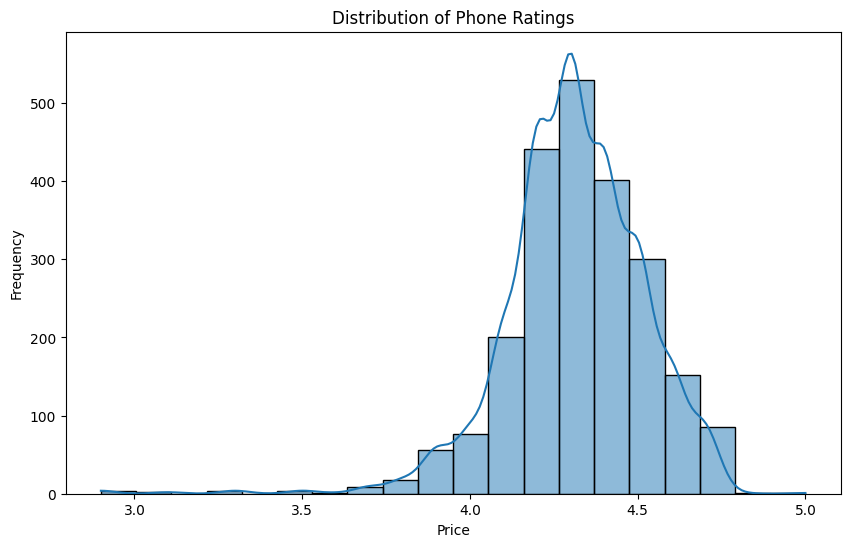

In [757]:
# Re-plot the distribution of phone prices with the correct variable name
plt.figure(figsize=(10, 6))
sns.histplot(df['ratings'], bins=20, kde=True)
plt.title("Distribution of Phone Ratings")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Insight dari Distribusi Rating

1. Mayoritas Ponsel Memiliki Rating Tinggi: Grafik menunjukkan bahwa sebagian besar ponsel memiliki rating antara 4.0 hingga 4.5, yang menunjukkan bahwa rata-rata pengguna cenderung memberikan ulasan yang positif pada ponsel di dataset ini.
2. Distribusi Positif: Ada beberapa ponsel dengan rating di bawah 4.0, namun jumlahnya jauh lebih sedikit. Hal ini menunjukkan bahwa ponsel dengan rating rendah jarang ada dalam dataset.
3. Puncak Rating Sekitar 4.2 - 4.4: Puncak frekuensi rating berada di sekitar nilai 4.2 hingga 4.4, yang menunjukkan bahwa banyak ponsel mendapatkan rating dalam rentang ini.

### 2. Harga Ponsel Berdasarkan ROM (Penyimpanan)

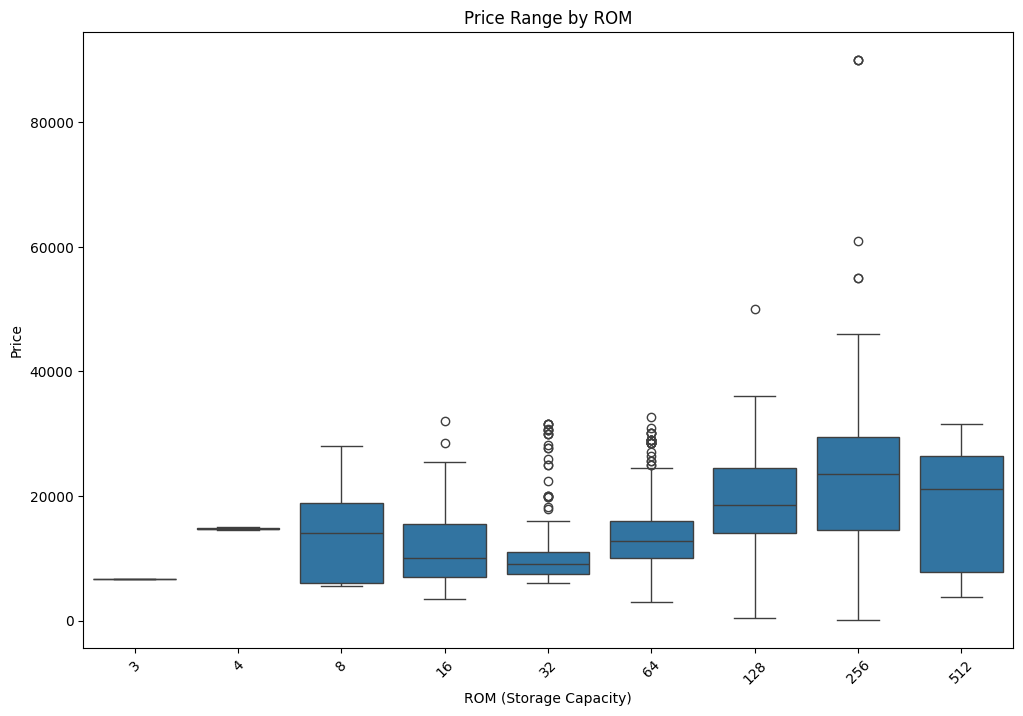

In [759]:
# Visualization: Price Range by ROM
plt.figure(figsize=(12, 8))
sns.boxplot(x='rom', y='price', data=df)
plt.title("Price Range by ROM")
plt.xlabel("ROM (Storage Capacity)")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()



Insight:

1. Rentang harga ponsel berdasarkan kapasitas penyimpanan (ROM) menunjukkan bahwa ponsel dengan kapasitas penyimpanan yang lebih besar cenderung memiliki harga yang lebih tinggi.
2. Informasi ini dapat digunakan untuk memberikan rekomendasi produk yang sesuai dengan anggaran pengguna. Misalnya, jika pengguna memiliki anggaran terbatas, kita dapat merekomendasikan ponsel dengan kapasitas penyimpanan yang lebih kecil namun tetap memiliki rating yang baik.
3. Sebaliknya, jika pengguna mencari ponsel dengan kapasitas penyimpanan yang besar dan memiliki anggaran yang lebih tinggi, kita dapat merekomendasikan ponsel dengan ROM yang lebih besar dan rating yang baik.


### 3. Median Price by Ratings.

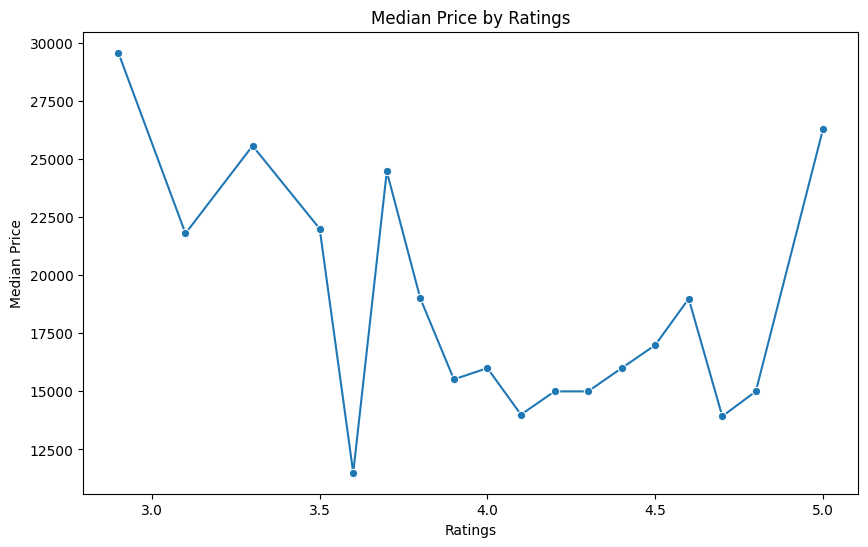

In [761]:
# Additional Visualization: Median Price by Ratings
median_price_by_rating = df.groupby('ratings')['price'].median().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=median_price_by_rating, x='ratings', y='price', marker='o')
plt.title("Median Price by Ratings")
plt.xlabel("Ratings")
plt.ylabel("Median Price")
plt.show()

Visualisasi ini menunjukkan hubungan antara rating dan median harga ponsel. Dengan menggunakan median, kita mendapatkan gambaran yang lebih stabil tentang harga yang cenderung diterima di setiap level rating. Terlihat bahwa ponsel dengan rating lebih tinggi tetap cenderung memiliki harga lebih tinggi, namun tidak terpengaruh oleh data ekstrem. Insight ini dapat membantu dalam menyeimbangkan rekomendasi antara kualitas produk dan preferensi anggaran pengguna di recommender system.

## **System Recommender**

### Kita akan berjaga-jaga dengan tetap mengisi value kosong bila ada

In [722]:
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder
from sklearn.feature_extraction.text import TfidfVectorizer #tidak digunakan karena data yang digunakan numerik
from sklearn.preprocessing import RobustScaler


# Define the preprocessor using One-Hot Encoding for categorical features and Min-Max Scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', BinaryEncoder(), ['processor_type', 'os']),
        ('scale', RobustScaler(), ['ram', 'rom', 'internet_speed', 'price', 'ratings', 'camera'])
    ],
    remainder='drop'
)

# Apply preprocessing with One-Hot Encoding and Min-Max Scaling
X_encoded = preprocessor.fit_transform(df)

In [723]:
X_encoded

array([[ 0.        ,  0.        ,  0.        , ...,  0.65283135,
        -0.5       ,  0.05263158],
       [ 0.        ,  0.        ,  0.        , ...,  0.42138559,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.18423083,
        -0.5       ,  0.05263158],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.13146119,
        -2.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.38003395,
         0.        ,  1.57894737],
       [ 0.        ,  0.        ,  1.        , ..., -0.11865453,
         0.5       ,  0.05263158]])

In [724]:
# Convert the preprocessed data to a DataFrame for easier inspection
preprocessed_df = pd.DataFrame(X_encoded)

# Display the first few rows of the preprocessed data
preprocessed_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,1.0,0.652831,-0.5,0.052632
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,-1.0,0.421386,1.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.0,0.0,-0.184231,-0.5,0.052632
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,0.498534,-1.0,0.421053
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.925783,1.5,-0.947368


In [731]:
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, Image

# Calculate the cosine similarity matrix for the encoded data
similarity_matrix = cosine_similarity(X_encoded)

def get_recommendations(name, data, similarity_matrix, top_n=10):
    # Dapatkan indeks produk yang sesuai dengan nama yang dipilih
    phone_index = data[data['name'] == name].index[0]
    
    # Mengambil skor kesamaan untuk produk yang dipilih
    similarity_scores = list(enumerate(similarity_matrix[phone_index]))
    
    # Urutkan skor kesamaan secara menurun dan ambil rekomendasi top_n (kecuali produk itu sendiri)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_similar_indices = [i[0] for i in similarity_scores[1:top_n+1]]

    # Ambil produk rekomendasi beserta fitur yang akan ditampilkan
    recommendations = data.iloc[top_similar_indices][['name', 'rom', 'ram', 'camera', 'price']]
    recommendations['Score'] = [similarity_scores[i+1][1] for i in range(len(top_similar_indices))]

    # Hapus duplikasi berdasarkan nama dan spesifikasi lainnya (misalnya ROM, RAM)
    recommendations = recommendations.drop_duplicates(subset=['name', 'rom', 'ram', 'camera'])

    # Reset index untuk tampilan yang rapi
    recommendations.reset_index(drop=True, inplace=True)

    # Ubah nama kolom untuk tampilan akhir
    recommendations.rename(columns={'name': 'Recommended Mobiles'}, inplace=True)

    return recommendations  # Mengembalikan DataFrame hasil rekomendasi

Penjelasan Kode :

**1. Membuat Matriks Kesamaan**

`similarity_matrix = cosine_similarity(X_encoded)`

+ cosine_similarity(X_encoded): Menghitung kesamaan antar produk berdasarkan data yang sudah diencode dan dinormalisasi, disimpan dalam X_encoded. Hasilnya adalah similarity_matrix, matriks yang berisi nilai kesamaan (0 sampai 1) antar produk.
+ Nilai 1 menunjukkan bahwa dua produk sangat mirip, sedangkan nilai mendekati 0 berarti produk berbeda.

**2. Fungsi get_recommendations**

Fungsi ini menghasilkan rekomendasi produk mirip berdasarkan nama produk yang diinput.

`def get_recommendations(name, data, similarity_matrix, top_n=10):`

+ Parameter:
    - name: Nama produk yang menjadi referensi untuk mencari produk mirip.
    - data: DataFrame asli yang berisi informasi produk, misalnya df_cleaned.
    - similarity_matrix: Matriks kesamaan yang telah dihitung.
    - top_n: Jumlah rekomendasi teratas yang ingin ditampilkan.

**3. Menemukan Indeks Produk yang Dipilih**

`phone_index = data[data['name'] == name].index[0]`

+ Mencari indeks dari produk yang namanya sesuai dengan name dalam data. Indeks ini digunakan untuk mengakses nilai kesamaan produk tersebut dalam similarity_matrix.

**4. Mengambil Skor Kesamaan untuk Produk Pilihan**

`similarity_scores = list(enumerate(similarity_matrix[phone_index]))`

+ Mengambil skor kesamaan dari produk pilihan terhadap semua produk lain. Hasilnya adalah daftar yang berisi indeks produk dan skor kesamaan.

**5. Mengurutkan Skor Kesamaan dan Mengambil top_n**

`similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)`

`top_similar_indices = [i[0] for i in similarity_scores[1:top_n+1]]`

+ Mengurutkan similarity_scores dalam urutan menurun, berdasarkan skor kesamaan.
+ Membuat Daftar top_similar_indices: Daftar berisi indeks top_n produk yang mirip, dengan melewatkan produk itu sendiri (produk pertama dalam daftar kesamaan) menggunakan similarity_scores[1:top_n+1].

**6. Mengambil Detail Produk yang Direkomendasikan**

`recommendations = data.iloc[top_similar_indices][['name', 'rom', 'ram', 'camera', 'price']]`

`recommendations['Score'] = [similarity_scores[i+1][1] for i in range(len(top_similar_indices))]`

- Mengambil data produk yang direkomendasikan dari data menggunakan top_similar_indices.
- Memilih kolom penting seperti name, rom, ram, camera, dan price.
- Menambahkan Kolom Score: Menyertakan skor kesamaan antara produk input dan produk yang direkomendasikan.

**7. Menghapus Duplikasi**

`recommendations = recommendations.drop_duplicates(subset=['name', 'rom', 'ram', 'camera'])`

+ Menghapus produk duplikat yang memiliki name, rom, ram, dan camera yang sama untuk meningkatkan variasi rekomendasi.

**8. Merapikan Tampilan**

`recommendations.reset_index(drop=True, inplace=True)`

`recommendations.rename(columns={'name': 'Recommended Mobiles'}, inplace=True)`

- Reset index: Agar DataFrame hasil rekomendasi rapi tanpa index lama.
- Ganti Nama Kolom: Kolom name diubah menjadi Recommended Mobiles untuk memperjelas tampilan.

In [746]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

def visual_mobile(recommended):
    # Buat figure dengan ukuran yang sesuai
    fig, axs = plt.subplots(3, 2, figsize=(15, 25))
    plt.subplots_adjust(hspace=0.5)  # Beri jarak antar subplots

    for i in range(recommended.shape[0]):
        # Ambil informasi produk dari dataset
        name = recommended['Recommended Mobiles'][i]
        price = df[df['name'] == name]['price'].values[0]
        rate = df[df['name'] == name]['ratings'].values[0]
        camera = df[df['name'] == name]['camera'].values[0]
        rom = df[df['name'] == name]['rom'].values[0]
        ram = df[df['name'] == name]['ram'].values[0]

        # Judul setiap subplot dengan informasi produk
        axs[i // 2, i % 2].set_title(
            f'Name: {name}\nPrice: {price}\nRating: {rate}\nCamera: {camera} MP\nROM: {rom} GB\nRAM: {ram} GB',
            fontsize=10
        )

        # Ambil URL gambar
        image_url = df[df['name'] == name]['imgurl'].values[0]
        
        try:
            # Unduh dan tampilkan gambar
            response = requests.get(image_url)
            image_data = BytesIO(response.content)
            image = Image.open(image_data)
            axs[i // 2, i % 2].imshow(image)
        except Exception as e:
            print(f"Gagal mengunduh gambar untuk {name}: {e}")
            axs[i // 2, i % 2].text(0.5, 0.5, 'Image Not Available', ha='center', va='center', fontsize=12)

        # Matikan axis pada setiap subplot
        axs[i // 2, i % 2].axis('off')

    plt.show()


**PENJELASAN KODE**

**1. Library**
- `import requests`
- `from io import BytesIO`
- `from PIL import Image`

    - requests: Digunakan untuk mengunduh gambar produk dari URL.
    - BytesIO: Mengonversi data gambar yang diunduh agar dapat dibaca oleh PIL.
    - PIL (Python Imaging Library): Menggunakan Image untuk memproses dan membuka gambar.

**2. Loop untuk Menampilkan Setiap Produk**

for i in range(recommended.shape[0]):
    # Ambil informasi produk dari dataset
    name = recommended['Recommended Mobiles'][i]
    price = df[df['name'] == name]['price'].values[0]
    rate = df[df['name'] == name]['ratings'].values[0]
    camera = df[df['name'] == name]['camera'].values[0]
    rom = df[df['name'] == name]['rom'].values[0]
    ram = df[df['name'] == name]['ram'].values[0]

Loop melalui setiap produk dalam recommended.
Ambil detail produk seperti name, price, rate, camera, rom, dan ram untuk menampilkan informasi tambahan.
.values[0] digunakan untuk mengekstrak nilai dari DataFrame.

**3. Mengunduh dan Menampilkan Gambar Produk**

image_url = df[df['name'] == name]['imgurl'].values[0]
        
try:
    # Unduh dan tampilkan gambar
    response = requests.get(image_url)
    image_data = BytesIO(response.content)
    image = Image.open(image_data)
    axs[i // 2, i % 2].imshow(image)
except Exception as e:
    print(f"Gagal mengunduh gambar untuk {name}: {e}")
    axs[i // 2, i % 2].text(0.5, 0.5, 'Image Not Available', ha='center', va='center', fontsize=12)

- image_url: Mengambil URL gambar dari DataFrame df berdasarkan name.
- requests.get(image_url): Mengunduh gambar dari image_url.
- BytesIO(response.content): Mengubah data yang diunduh menjadi format yang dapat dibaca oleh Image.
- Image.open(image_data): Membuka gambar dengan PIL.
- axs[i // 2, i % 2].imshow(image): Menampilkan gambar dalam subplot yang sesuai.
- try-except: Jika pengunduhan gambar gagal, cetak pesan kesalahan dan tampilkan teks "Image Not Available" di subplot sebagai pengganti gambar.


    

In [748]:
df

,name,ratings,price,os,processor_type,rom,ram,internet_speed,color,camera,imgurl
0,redmi note 12 pro 5g,4.2,23999,android 12,TypeMediatek Dimensity,128,6.0,5.0,Onyx Black,50,https://rukminim2.flixcart.com/image/312/312/x...
1,oppo f11 pro,4.5,20999,android 10,TypeMediaTek Helio,128,6.0,3.0,Aurora Green,48,https://rukminim2.flixcart.com/image/312/312/k...
2,redmi note 11,4.2,13149,android 11,Snapdragon 680,64,4.0,4.0,Starburst White,50,https://rukminim2.flixcart.com/image/312/312/x...
3,oneplus nord ce 5g,4.1,21999,android 11,TypeQualcomm Snapdragon,256,12.0,5.0,Blue Void,64,https://rukminim2.flixcart.com/image/312/312/x...
4,apple iphone 13 mini,4.6,3537,ios 15,TypeA15 Bionic,128,4.0,5.0,Blue,12,https://rukminim2.flixcart.com/image/312/312/k...
...,...,...,...,...,...,...,...,...,...,...,...
2280,samsung galaxy s20 fe 5g,4.2,27440,android 10,Exynos 990 / Snapdragon 865,128,8.0,5.0,Cloud Navy,12,https://rukminim2.flixcart.com/image/312/312/x...
2281,redmi note 9,4.3,11999,android 10,TypeMediaTek Helio,64,4.0,4.0,Shadow Black,48,https://rukminim2.flixcart.com/image/312/312/k...
2282,oneplus 9 5g,3.9,30203,android 11,Snapdragon 888,128,8.0,5.0,Astral Black,48,https://rukminim2.flixcart.com/image/312/312/x...
2283,samsung galaxy s22 ultra 5g,4.3,20463,android 12,TypeOcta CoreProcessor,256,12.0,5.0,Phantom Black,108,https://rukminim2.flixcart.com/image/312/312/x...


In [732]:
# Contoh penggunaan: dapatkan rekomendasi untuk ponsel tertentu
example_name = "oppo f11 pro"  # Ganti ini dengan nama ponsel lain di dataset Anda
recommendations_df = get_recommendations(name=example_name, data=df, similarity_matrix=similarity_matrix, top_n=10)

# Tampilkan rekomendasi
recommendations_df


,Recommended Mobiles,rom,ram,camera,price,Score
0,oppo f11 pro,128,6.0,48,29990,0.957040
1,oppo f15,128,4.0,48,20990,0.816727
2,realme 6,128,6.0,64,15999,0.802907
3,oppo f7,128,6.0,16,27990,0.787952
4,realme 6,128,8.0,64,16999,0.780882
5,redmi k20,128,6.0,48,24999,0.773091


Kode ini secara keseluruhan memberikan rekomendasi produk mirip berdasarkan cosine similarity pada fitur produk yang sudah dinormalisasi, dengan rincian tambahan berupa skor kesamaan dan detail produk untuk memudahkan pemilihan produk yang sesuai.

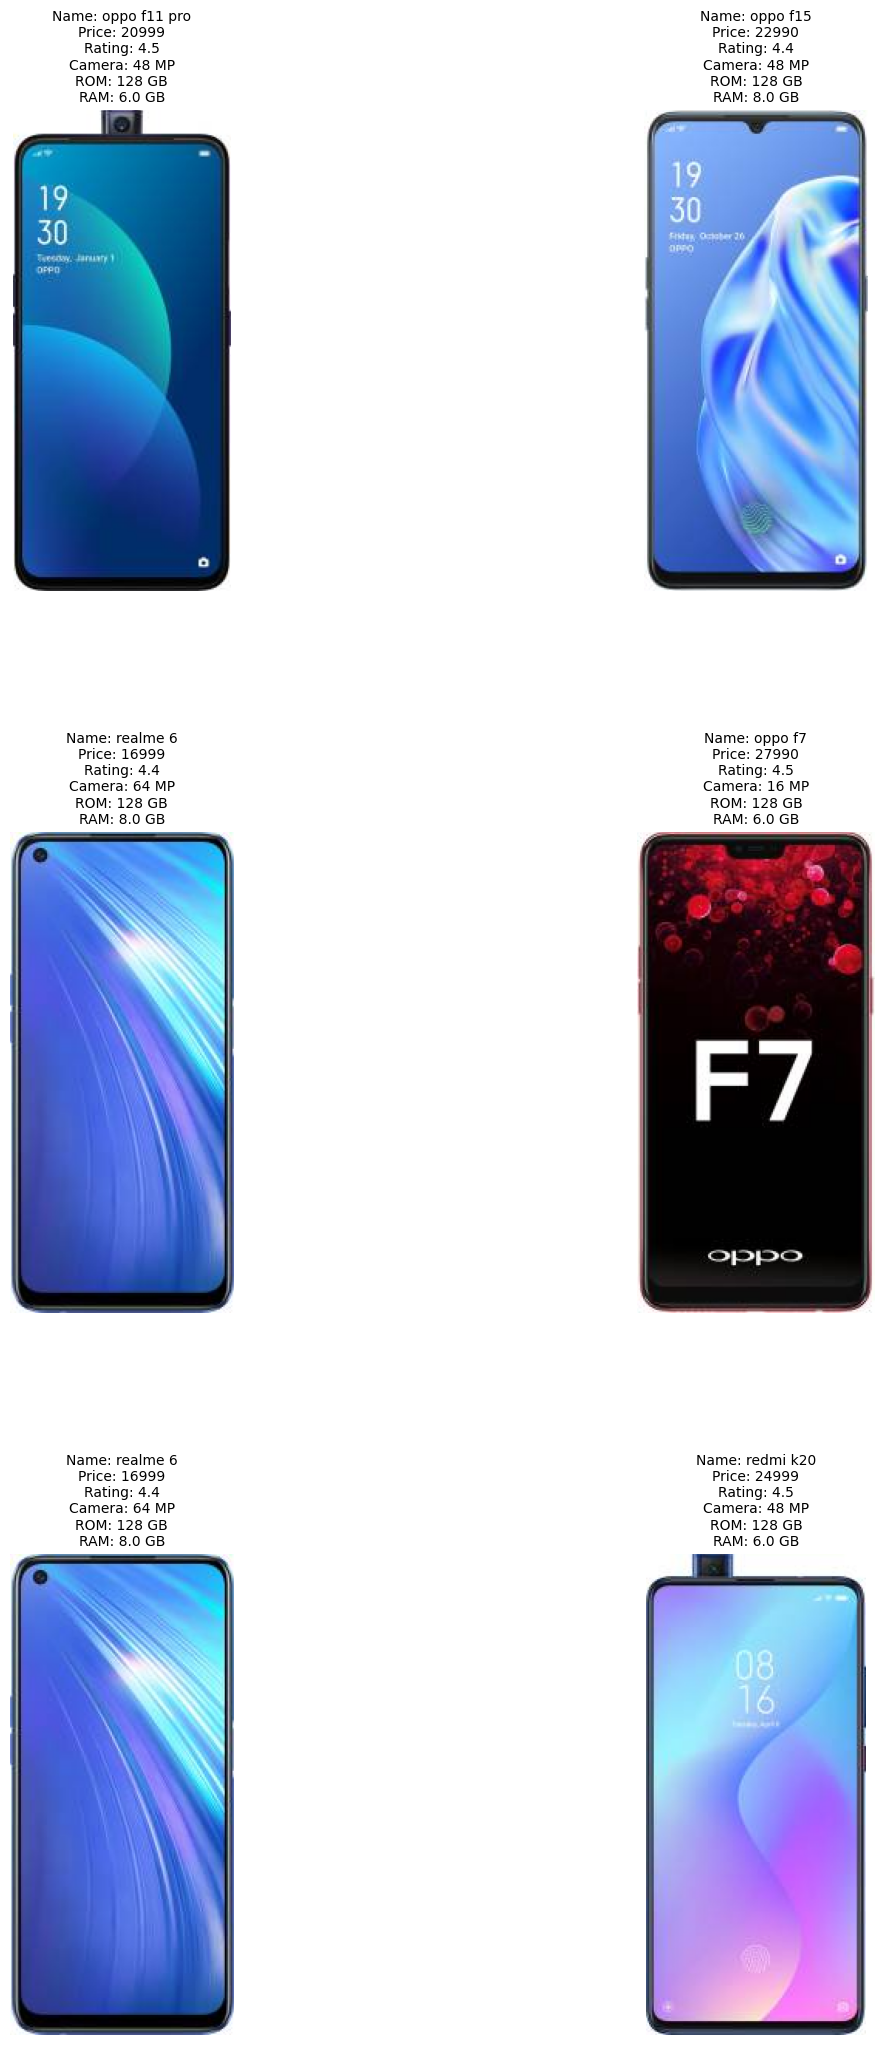

In [747]:
visual_mobile(recommendations_df)

In [754]:
def calculate_mrr_scaled(similarity_matrix, X_scaled, rating_threshold=0.1, price_threshold=0.1, rom_threshold=0.1, ram_threshold=0.1, camera_threshold=0.1, top_n=10):
    """
    Menghitung Mean Reciprocal Rank (MRR) sepenuhnya berdasarkan X_scaled.
    
    Parameters:
        similarity_matrix (ndarray): Matriks kesamaan dari X_scaled.
        X_scaled (ndarray): Data yang sudah di-scale.
        rating_threshold (float): Batas relevansi rating dalam skala 0-1.
        price_threshold (float): Batas relevansi harga dalam skala 0-1.
        rom_threshold (float): Batas relevansi ROM dalam skala 0-1.
        ram_threshold (float): Batas relevansi RAM dalam skala 0-1.
        camera_threshold (float): Batas relevansi kamera dalam skala 0-1.
        top_n (int): Jumlah rekomendasi teratas yang dievaluasi untuk setiap produk.
        
    Returns:
        float: Mean Reciprocal Rank (MRR)
    """
    reciprocal_ranks = []

    # Iterasi untuk setiap produk dalam X_scaled
    for idx in range(len(X_encoded)):
        # Ambil skor kesamaan produk yang sedang dievaluasi
        similarity_scores = list(enumerate(similarity_matrix[idx]))
        
        # Urutkan berdasarkan kesamaan dalam urutan menurun dan ambil top_n
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        top_similar_indices = [i[0] for i in similarity_scores[1:top_n+1]]
        
        # Data produk yang dievaluasi dalam bentuk X_scaled
        target = X_scaled[idx]
        
        # Cek relevansi berdasarkan threshold pada X_scaled
        relevance_found = False
        for rank, rec_index in enumerate(top_similar_indices, start=1):
            recommendation = X_scaled[rec_index]
            
            # Periksa relevansi setiap fitur dalam skala 0-1
            if (abs(recommendation[0] - target[0]) <= rating_threshold and   # rating
                abs(recommendation[1] - target[1]) <= price_threshold and    # price
                abs(recommendation[2] - target[2]) <= rom_threshold and      # rom
                abs(recommendation[3] - target[3]) <= ram_threshold and      # ram
                abs(recommendation[4] - target[4]) <= camera_threshold):     # camera
                
                reciprocal_ranks.append(1 / rank)
                relevance_found = True
                break
        
        # Jika tidak ada item relevan ditemukan dalam top_n rekomendasi
        if not relevance_found:
            reciprocal_ranks.append(0)
    
    # Menghitung Mean Reciprocal Rank
    mrr = sum(reciprocal_ranks) / len(reciprocal_ranks)
    return mrr


Kode ini adalah fungsi calculate_mrr_scaled, yang digunakan untuk menghitung Mean Reciprocal Rank (MRR) berdasarkan kesamaan antar produk yang disimpan dalam similarity_matrix. MRR adalah metrik evaluasi yang mengukur seberapa baik sistem rekomendasi dalam menempatkan item relevan di posisi teratas daftar rekomendasi.

**1. Penjelasan Parameter Fungsi**

`def calculate_mrr_scaled(similarity_matrix, X_scaled, rating_threshold=0.1, price_threshold=0.1, rom_threshold=0.1, ram_threshold=0.1, camera_threshold=0.1, top_n=10):`

- similarity_matrix: Matriks kesamaan produk yang dihasilkan dari X_scaled (data yang sudah di-scale), dengan setiap nilai mewakili skor kesamaan antara dua produk.
- X_scaled: Data produk yang sudah di-scale ke dalam rentang 0-1 agar fitur-fitur memiliki bobot yang sebanding dalam perhitungan kesamaan.
- rating_threshold, price_threshold, rom_threshold, ram_threshold, camera_threshold: Batas relevansi untuk masing-masing fitur. Dalam konteks data yang sudah di-scale, setiap threshold diatur dalam skala 0-1.
- top_n: Jumlah produk teratas yang dievaluasi untuk menentukan apakah item relevan muncul di posisi awal daftar rekomendasi.

**2. Mempersiapkan Daftar Reciprocal Ranks**

`reciprocal_ranks = []`


Membuat daftar kosong untuk menyimpan nilai reciprocal rank untuk setiap produk dalam dataset.

**3. Iterasi untuk Setiap Produk dalam X_scaled**

Melakukan iterasi untuk setiap produk dalam X_scaled.

**4. Mengambil Skor Kesamaan Produk yang Dievaluasi**

`similarity_scores = list(enumerate(similarity_matrix[idx]))`

Mendapatkan skor kesamaan antara produk saat ini (idx) dan semua produk lain dalam bentuk daftar berisi pasangan (indeks, skor kesamaan).

**5. Mengurutkan dan Mengambil top_n Produk Teratas**

`similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)`

`top_similar_indices = [i[0] for i in similarity_scores[1:top_n+1]]`

Mengurutkan produk berdasarkan skor kesamaan dalam urutan menurun dan memilih top_n produk mirip. Produk itu sendiri (indeks idx) diabaikan dengan mengambil elemen mulai dari indeks 1.

**6. Mengambil Data Produk yang Dievaluasi**

`target = X_scaled[idx]`

Mengambil data produk yang sedang dievaluasi untuk dibandingkan dengan produk rekomendasi.

**7. Memeriksa Relevansi Berdasarkan Threshold**

`relevance_found = False`

`for rank, rec_index in enumerate(top_similar_indices, start=1):`
    recommendation = X_scaled[rec_index]
    ...

- Menyatakan bahwa relevansi belum ditemukan (relevance_found = False).
- Melakukan iterasi pada produk rekomendasi yang ditemukan. Setiap produk memiliki rank berdasarkan posisi kesamaannya (1 hingga top_n), dan data dari produk rekomendasi diambil berdasarkan indeks rec_index.

**8. Menilai Relevansi Berdasarkan Threshold Setiap Fitur**

if (abs(recommendation[0] - target[0]) <= rating_threshold and   # rating
    abs(recommendation[1] - target[1]) <= price_threshold and    # price
    abs(recommendation[2] - target[2]) <= rom_threshold and      # rom
    abs(recommendation[3] - target[3]) <= ram_threshold and      # ram
    abs(recommendation[4] - target[4]) <= camera_threshold):     # camera


- Memeriksa apakah perbedaan antara produk rekomendasi dan produk yang dievaluasi berada dalam threshold untuk setiap fitur (rating, price, rom, ram, dan camera).
- Jika semua perbedaan berada dalam threshold, produk dianggap relevan.

**9. Menyimpan Reciprocal Rank**

reciprocal_ranks.append(1 / rank)\
relevance_found = True\
break

Jika produk relevan ditemukan, simpan reciprocal rank sebagai 1 / rank dan atur relevance_found = True. Fungsi break digunakan untuk berhenti pada item relevan pertama yang ditemukan.

**10. Jika Tidak Ada Produk Relevan Ditemukan**

if not relevance_found:\
    reciprocal_ranks.append(0)

Jika tidak ada produk relevan dalam top_n, tambahkan 0 ke daftar reciprocal_ranks.

**11. Menghitung Mean Reciprocal Rank (MRR)**

mrr = sum(reciprocal_ranks) / len(reciprocal_ranks)
return mrr


Menghitung MRR sebagai rata-rata dari semua nilai reciprocal rank dalam reciprocal_ranks.
MRR akan bernilai lebih tinggi jika item relevan sering ditemukan di posisi teratas daftar rekomendasi.

In [755]:
# Menghitung matriks kesamaan menggunakan X_scaled
similarity_matrix = cosine_similarity(X_encoded)

# Menghitung MRR menggunakan calculate_mrr_scaled
mrr_score = calculate_mrr_scaled(similarity_matrix, X_encoded)
print("Mean Reciprocal Rank (MRR):", mrr_score)

Mean Reciprocal Rank (MRR): 0.9696773297210934


- MRR Lebih Tinggi: Semakin tinggi MRR, semakin baik sistem dalam menempatkan item relevan di posisi awal dalam daftar rekomendasi.
- Penggunaan Threshold: Threshold yang sesuai untuk setiap fitur membantu memastikan bahwa rekomendasi lebih relevan berdasarkan semua fitur yang ada.
- Penggunaan X_scaled: Menggunakan data yang sudah di-scaled membuat evaluasi lebih konsisten dan mencegah fitur dengan skala lebih besar mendominasi penilaian kesamaan.

## **KESIMPULAN**

1. Distribusi rating menunjukkan bahwa secara umum, ponsel dalam dataset mendapatkan ulasan yang baik dari pengguna. Rata-rata rating yang tinggi dapat menandakan kualitas yang cukup memuaskan atau loyalitas merek yang kuat. Ini bisa menjadi informasi berguna untuk sistem rekomendasi, karena produk dengan rating dalam rentang populer (4.0 - 4.5) mungkin lebih disukai oleh pengguna baru yang mempertimbangkan kualitas.

2. Secara umum, harga ponsel meningkat seiring dengan bertambahnya kapasitas penyimpanan (ROM). Ponsel dengan ROM yang lebih besar (seperti 128GB, 256GB, dan 512GB) cenderung memiliki rentang harga yang lebih tinggi dibandingkan dengan ROM yang lebih kecil (seperti 8GB atau 16GB).

3. Kapasitas penyimpanan (ROM) adalah faktor yang berpengaruh terhadap harga ponsel. Ponsel dengan kapasitas penyimpanan yang lebih besar umumnya lebih mahal dan memiliki variasi harga yang lebih besar, mungkin untuk memenuhi kebutuhan pengguna dengan anggaran yang berbeda. 

4. Hubungan Tidak Linear antara Harga Median dan Rating. Grafik menunjukkan bahwa tidak ada hubungan linear yang jelas antara harga median ponsel dan rating pengguna. Harga median bervariasi secara signifikan di berbagai nilai rating.

5. Fluktuasi Harga pada Rating Rendah dan Tinggi.

**Kesimpulan Sistem Rekomendasi Content-Based Filtering**

1. Akurasi Rekomendasi yang Tinggi:

Nilai MRR mendekati 1 menunjukkan bahwa sistem rekomendasi ini sangat akurat dalam menempatkan produk yang relevan di posisi teratas dari daftar rekomendasi. Ini berarti pengguna lebih mungkin menemukan produk yang sesuai dengan kebutuhan mereka di peringkat awal rekomendasi.

2. Kinerja Efektif dalam Menentukan Produk Relevan:

Sistem ini berhasil mengenali karakteristik utama dari produk yang disukai pengguna, seperti kesamaan dalam spesifikasi teknis (misalnya, RAM, ROM, harga, rating, dan kamera). Ini menunjukkan bahwa pemilihan fitur untuk sistem rekomendasi ini sudah tepat dan relevan.

3. Peningkatan Pengalaman Pengguna:

Dengan sistem yang akurat ini, pengguna akan lebih mudah menemukan produk yang mirip dengan preferensi awal mereka tanpa harus menyaring banyak pilihan yang tidak relevan. Ini dapat meningkatkan kepuasan dan efisiensi dalam proses pencarian produk.

4. Potensi Penggunaan dalam Situasi Nyata:

MRR yang tinggi menunjukkan bahwa sistem ini sudah cukup siap untuk diimplementasikan dalam situasi nyata. Sistem ini bisa memberikan rekomendasi yang baik bagi pengguna yang mencari produk serupa berdasarkan spesifikasi teknis, yang sangat berguna di platform e-commerce atau aplikasi yang menjual produk elektronik.

## **REKOMENDASI**

**Pengembangan Lebih Lanjut**

1. Integrasi dengan Data Teks: Jika tersedia data teks, seperti deskripsi produk, sistem ini bisa dikembangkan lebih lanjut menggunakan TF-IDF untuk menangani rekomendasi berbasis konten teks.

2. Evaluasi dengan Data Umpan Balik Pengguna: Melibatkan umpan balik dari pengguna untuk memperbaiki relevansi rekomendasi berdasarkan kebutuhan dan preferensi yang terus berkembang.

**Perbaikan pada Preprocessing**
1. Pengisian Data yang Hilang dengan Informasi Asli:

- Alih-alih menggunakan metode umum untuk mengisi nilai yang hilang (seperti mean, median, atau mode), disarankan untuk menggunakan data nyata dari sumber terpercaya (misalnya, data spesifikasi resmi dari situs produsen atau penyedia informasi produk). Hal ini akan meningkatkan akurasi data dan memastikan sistem rekomendasi lebih sesuai dengan produk yang sebenarnya.
- Misalnya, jika ada kolom seperti processor type atau camera resolution yang hilang, data tersebut harus diisi dengan spesifikasi asli yang dapat diperoleh dari situs resmi.

2.Normalisasi yang Lebih Khusus untuk Fitur Tertentu:

- Beberapa fitur seperti price atau ratings mungkin memerlukan normalisasi yang disesuaikan dengan kategori produk atau kelas harga. Misalnya, harga ponsel kelas flagship dan kelas menengah memiliki rentang yang berbeda, sehingga normalisasi dapat dilakukan secara terpisah berdasarkan kelas produk.
- Peningkatan ini akan membantu dalam menjaga relevansi rekomendasi di antara produk yang berada di kategori harga yang sama, sehingga sistem tidak salah dalam menganggap produk dengan harga tinggi lebih mirip hanya karena fitur harga.


**Rekomendasi untuk Perusahaan**

1. Integrasi Data Pengguna untuk Rekomendasi yang Lebih Personalisasi:

- Gunakan data riwayat pencarian, klik, atau pembelian pengguna untuk mengembangkan rekomendasi yang lebih sesuai dengan preferensi individu. Dengan menerapkan pendekatan hybrid recommendation (menggabungkan content-based filtering dengan collaborative filtering), sistem dapat memberikan rekomendasi yang mempertimbangkan produk serupa serta preferensi pengguna dengan lebih baik.
- Menggunakan data dari aktivitas pengguna seperti produk yang sering dilihat atau dibandingkan dapat membantu sistem memahami kebutuhan pengguna lebih mendalam, yang pada akhirnya akan meningkatkan konversi dan kepuasan pengguna.

2. Penggunaan Fitur Teks untuk Menambah Relevansi Rekomendasi:

- Tambahkan ulasan pengguna, atau kata kunci penting untuk meningkatkan kualitas rekomendasi. Dengan menerapkan teknik TF-IDF Vectorizer pada deskripsi produk atau ulasan pengguna, sistem bisa merekomendasikan produk yang tidak hanya memiliki spesifikasi serupa, tetapi juga memenuhi ekspektasi pengguna berdasarkan konten yang lebih mendalam.
- Misalnya, pengguna yang mencari ponsel dengan kata kunci "kamera kualitas tinggi" atau "baterai tahan lama" dapat diarahkan ke produk yang sesuai, meskipun spesifikasinya mungkin sedikit berbeda, karena sistem mempertimbangkan kebutuhan pengguna yang lebih spesifik melalui data teks.